In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.cluster.hierarchy as shc 
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('data.csv')
data.head()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20532 columns]

In [3]:
data.describe()

gene_0      gene_1      gene_2      gene_3      gene_4  gene_5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000   801.0   
mean     0.026642    3.010909    3.095350    6.722305    9.813612     0.0   
std      0.136850    1.200828    1.065601    0.638819    0.506537     0.0   
min      0.000000    0.000000    0.000000    5.009284    8.435999     0.0   
25%      0.000000    2.299039    2.390365    6.303346    9.464466     0.0   
50%      0.000000    3.143687    3.127006    6.655893    9.791599     0.0   
75%      0.000000    3.883484    3.802534    7.038447   10.142324     0.0   
max      1.482332    6.237034    6.063484   10.129528   11.355621     0.0   

           gene_6      gene_7      gene_8      gene_9  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     7.405509    0.499882    0.016744    0.013428  ...    5.896573   
std      1.108237    0.508799    0.133635    0.204722  ...    0.746399   
min      3.930747    0.000000    0.000000    0.000000  ...    2.853517   
25%      6.676042    0.000000    0.000000    0.000000  ...    5.454926   
50%      7.450114    0.443076    0.000000    0.000000  ...    5.972582   
75%      8.121984    0.789354    0.000000    0.000000  ...    6.411292   
max     10.718190    2.779008    1.785592    4.067604  ...    7.771054   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     8.765891   10.056252    4.847727    9.741987   11.742228   10.155271   
std      0.603176    0.379278    2.382728    0.533898    0.670371    0.580569   
min      6.678368    8.669456    0.000000    7.974942    9.045255    7.530141   
25%      8.383834    9.826027    3.130750    9.400747   11.315857    9.836525   
50%      8.784144   10.066385    5.444935    9.784524   11.749802   10.191207   
75%      9.147136   10.299025    6.637412   10.082269   12.177852   10.578561   
max     11.105431   11.318243    9.207495   11.811632   13.715361   11.675653   

       gene_20528  gene_20529  gene_20530  
count  801.000000  801.000000  801.000000  
mean     9.590726    5.528177    0.095411  
std      0.563849    2.073859    0.364529  
min      7.864533    0.593975    0.000000  
25%      9.244219    4.092385    0.000000  
50%      9.566511    5.218618    0.000000  
75%      9.917888    6.876382    0.000000  
max     12.813320   11.205836    5.254133  

[8 rows x 20531 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [5]:
labels = pd.read_csv('labels.csv')
labels.head()
labels["Class"].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [6]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.max().max()

20.7788287118

In [9]:
i=0
for col in data.columns:
    if data[col].mean() == 0:
        data.drop(col, inplace=True, axis=1)
        i = i + 1
print(i)

267


In [10]:
data.describe()

gene_0      gene_1      gene_2      gene_3      gene_4      gene_6  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     0.026642    3.010909    3.095350    6.722305    9.813612    7.405509   
std      0.136850    1.200828    1.065601    0.638819    0.506537    1.108237   
min      0.000000    0.000000    0.000000    5.009284    8.435999    3.930747   
25%      0.000000    2.299039    2.390365    6.303346    9.464466    6.676042   
50%      0.000000    3.143687    3.127006    6.655893    9.791599    7.450114   
75%      0.000000    3.883484    3.802534    7.038447   10.142324    8.121984   
max      1.482332    6.237034    6.063484   10.129528   11.355621   10.718190   

           gene_7      gene_8      gene_9     gene_10  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     0.499882    0.016744    0.013428    0.688177  ...    5.896573   
std      0.508799    0.133635    0.204722    1.173568  ...    0.746399   
min      0.000000    0.000000    0.000000    0.000000  ...    2.853517   
25%      0.000000    0.000000    0.000000    0.000000  ...    5.454926   
50%      0.443076    0.000000    0.000000    0.360196  ...    5.972582   
75%      0.789354    0.000000    0.000000    0.903887  ...    6.411292   
max      2.779008    1.785592    4.067604   12.293023  ...    7.771054   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     8.765891   10.056252    4.847727    9.741987   11.742228   10.155271   
std      0.603176    0.379278    2.382728    0.533898    0.670371    0.580569   
min      6.678368    8.669456    0.000000    7.974942    9.045255    7.530141   
25%      8.383834    9.826027    3.130750    9.400747   11.315857    9.836525   
50%      8.784144   10.066385    5.444935    9.784524   11.749802   10.191207   
75%      9.147136   10.299025    6.637412   10.082269   12.177852   10.578561   
max     11.105431   11.318243    9.207495   11.811632   13.715361   11.675653   

       gene_20528  gene_20529  gene_20530  
count  801.000000  801.000000  801.000000  
mean     9.590726    5.528177    0.095411  
std      0.563849    2.073859    0.364529  
min      7.864533    0.593975    0.000000  
25%      9.244219    4.092385    0.000000  
50%      9.566511    5.218618    0.000000  
75%      9.917888    6.876382    0.000000  
max     12.813320   11.205836    5.254133  

[8 rows x 20264 columns]

In [11]:
i = 0
for col in data.columns:
    if data[col].quantile(0.95) == 0.0:
        data.drop(col, inplace=True, axis=1)
        i = i + 1
print(i)

679


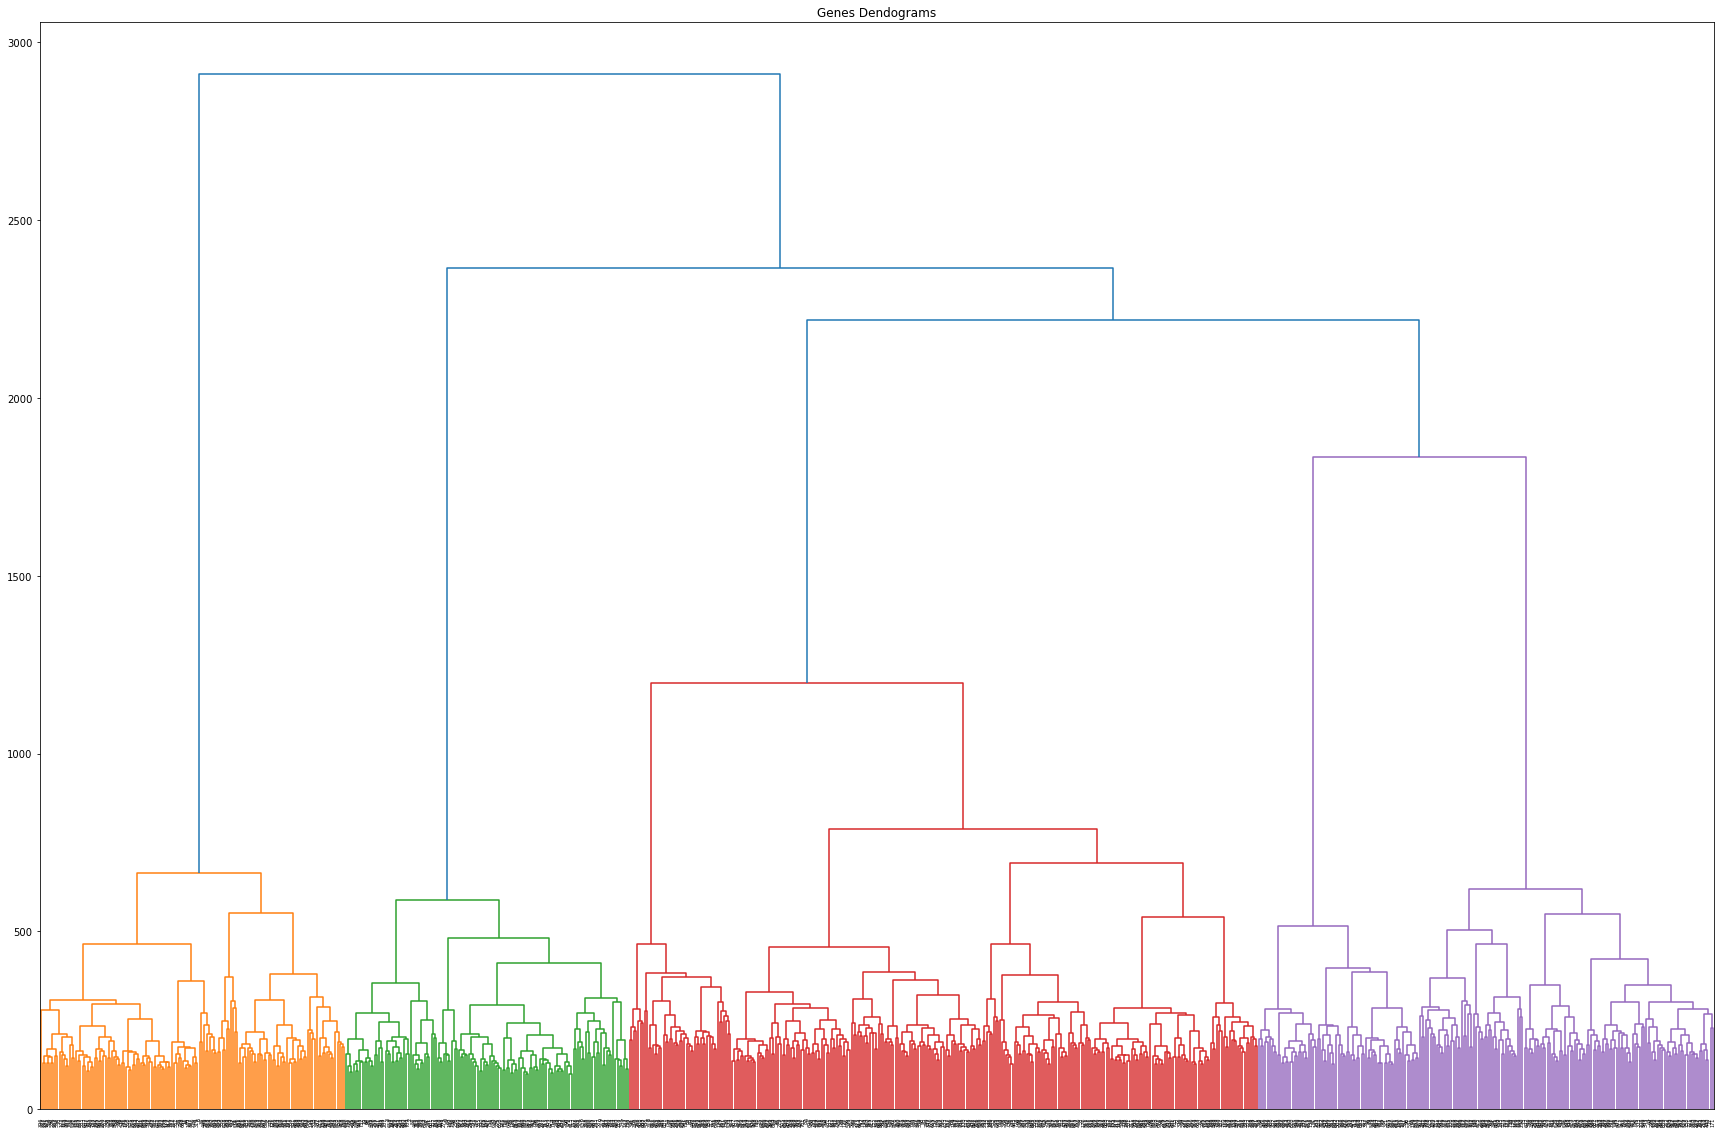

In [12]:
plt.figure(figsize=(30, 20))
plt.title("Genes Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward', metric='euclidean'))

--metod ward metric euclidean / / najbolje za euklidsko je ward metoda

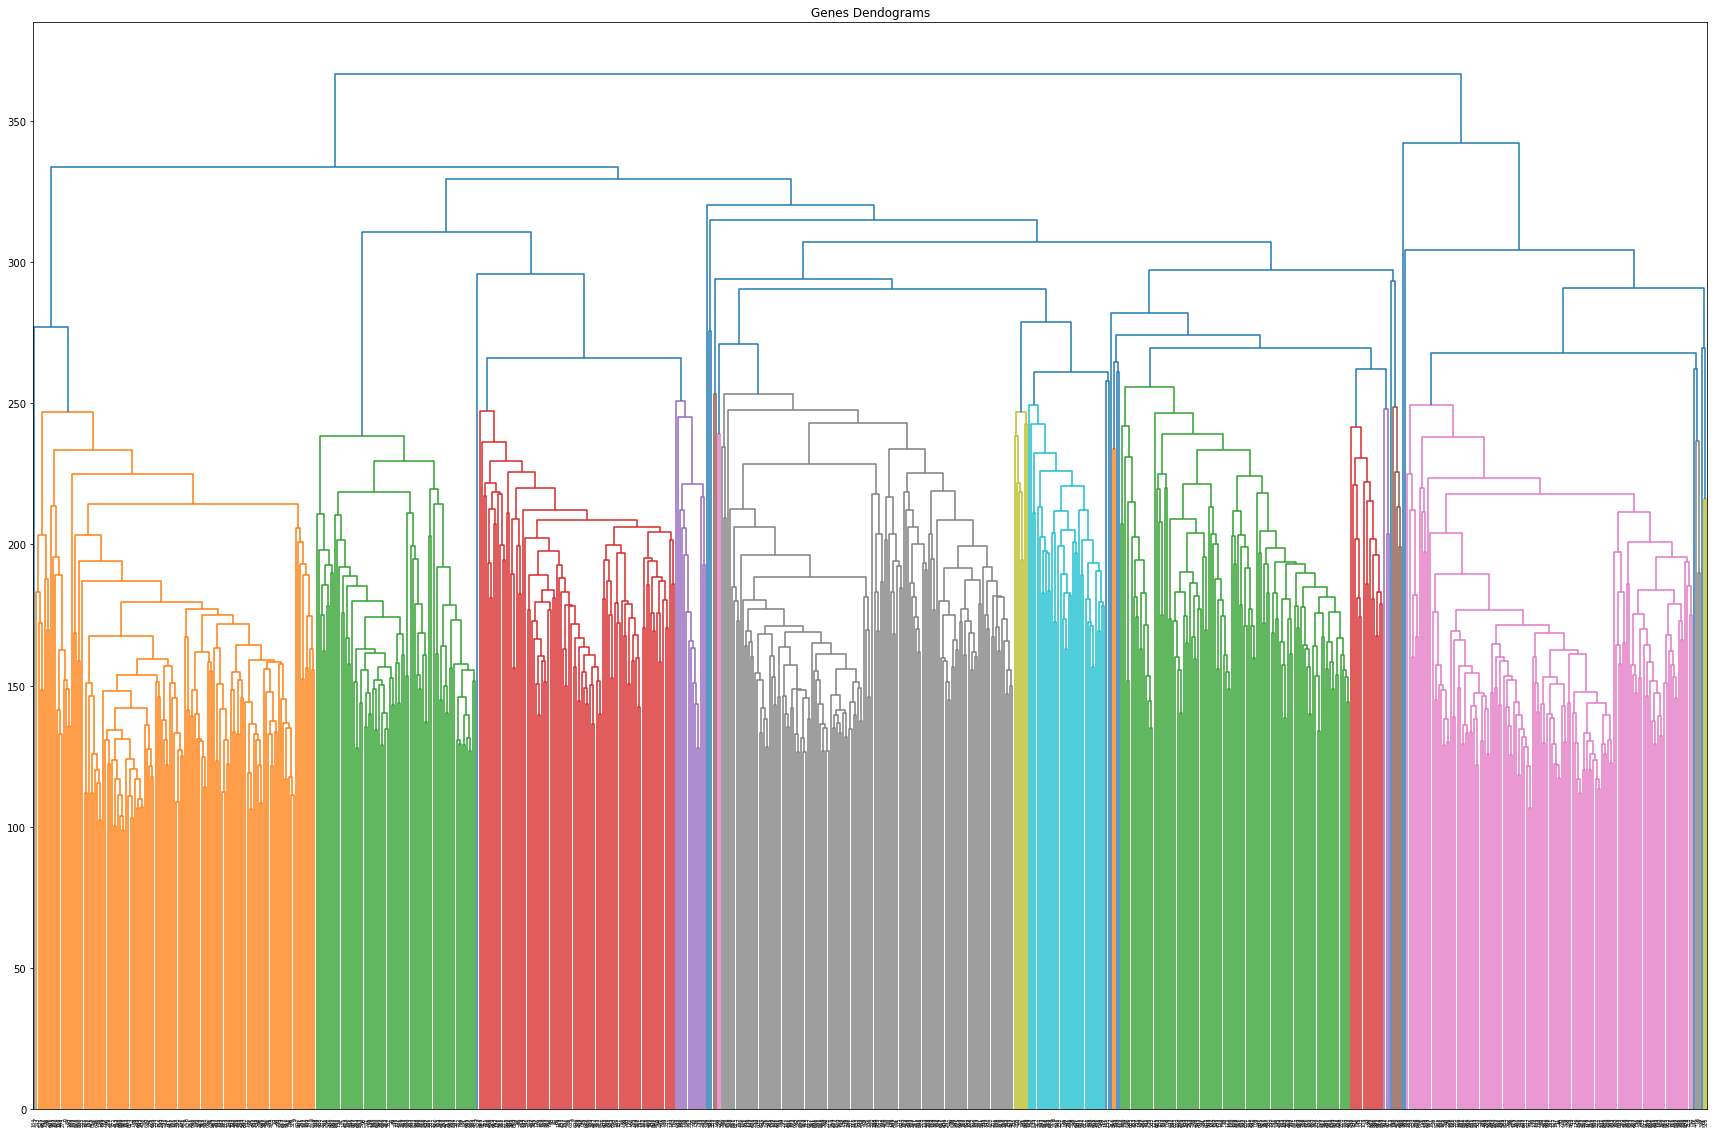

In [13]:
plt.figure(figsize=(30, 20))
plt.title("Genes Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='weighted', metric='minkowski'))

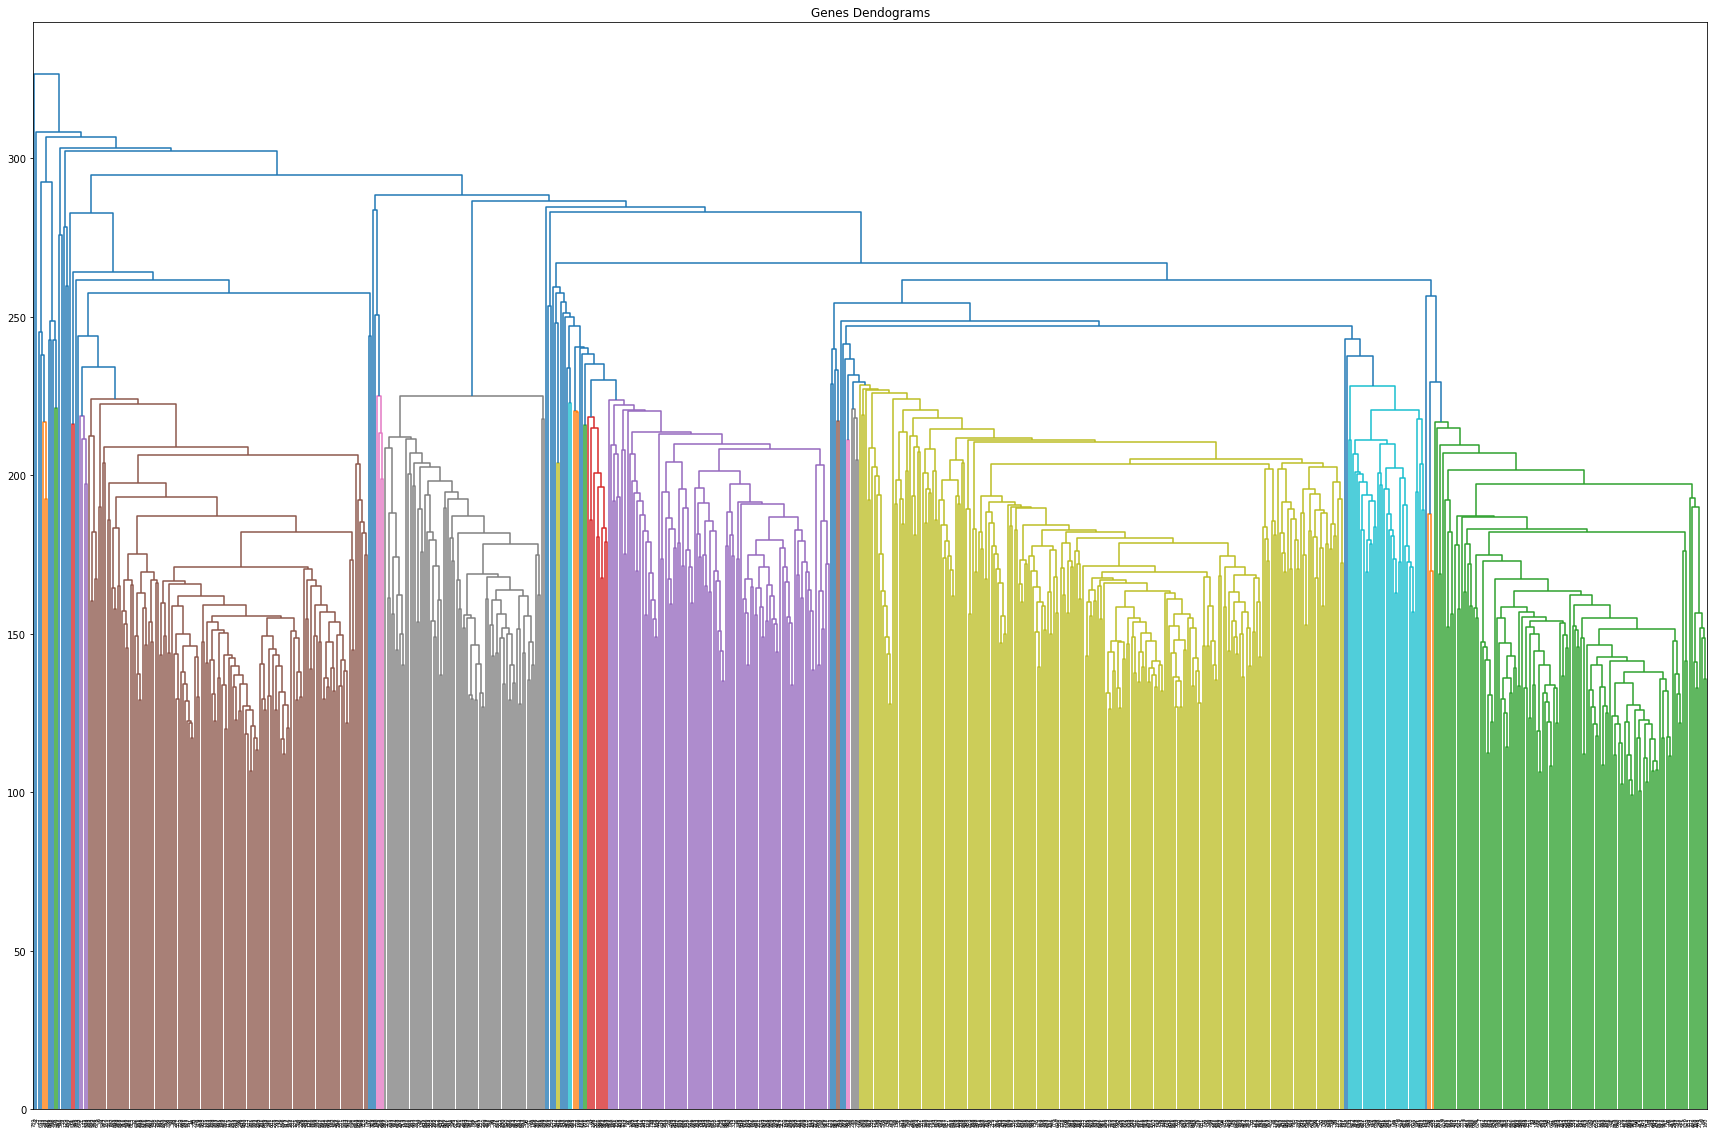

In [14]:
plt.figure(figsize=(30, 20))
plt.title("Genes Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='average', metric='minkowski'))

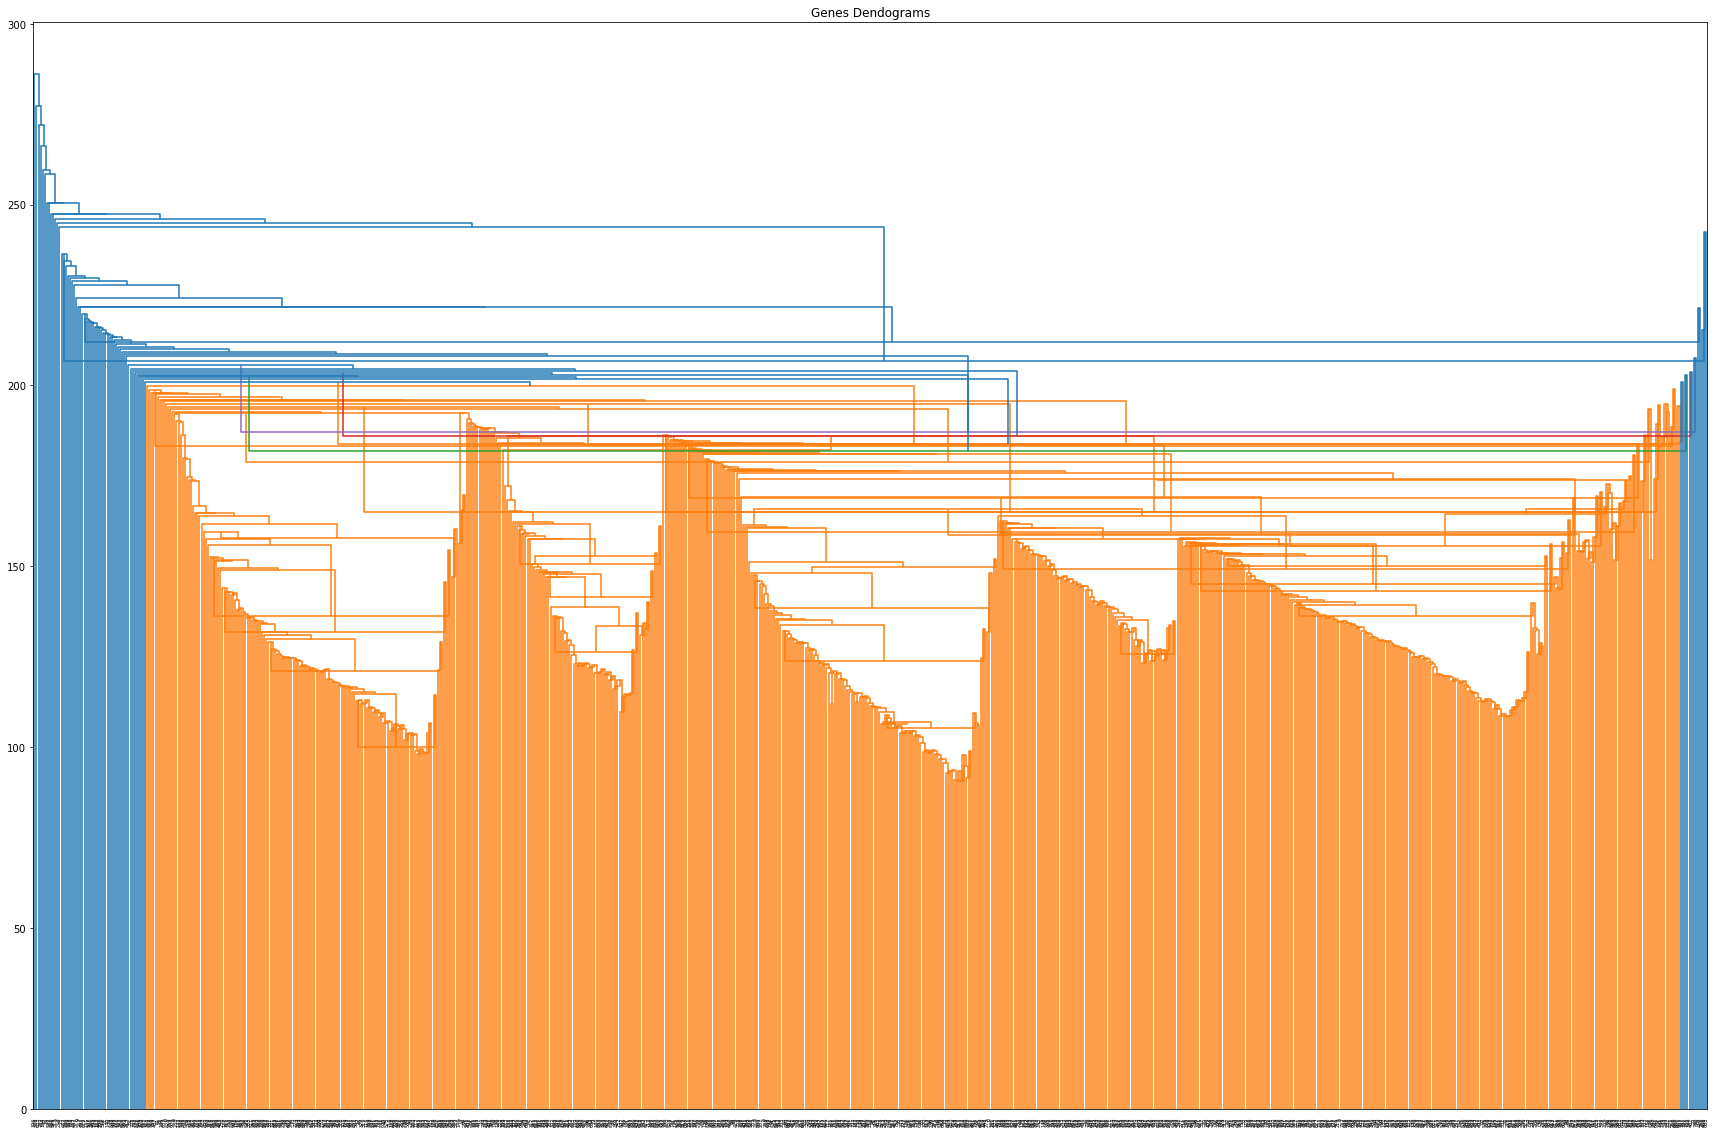

In [15]:
plt.figure(figsize=(30, 20))
plt.title("Genes Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='centroid', metric='euclidean'))

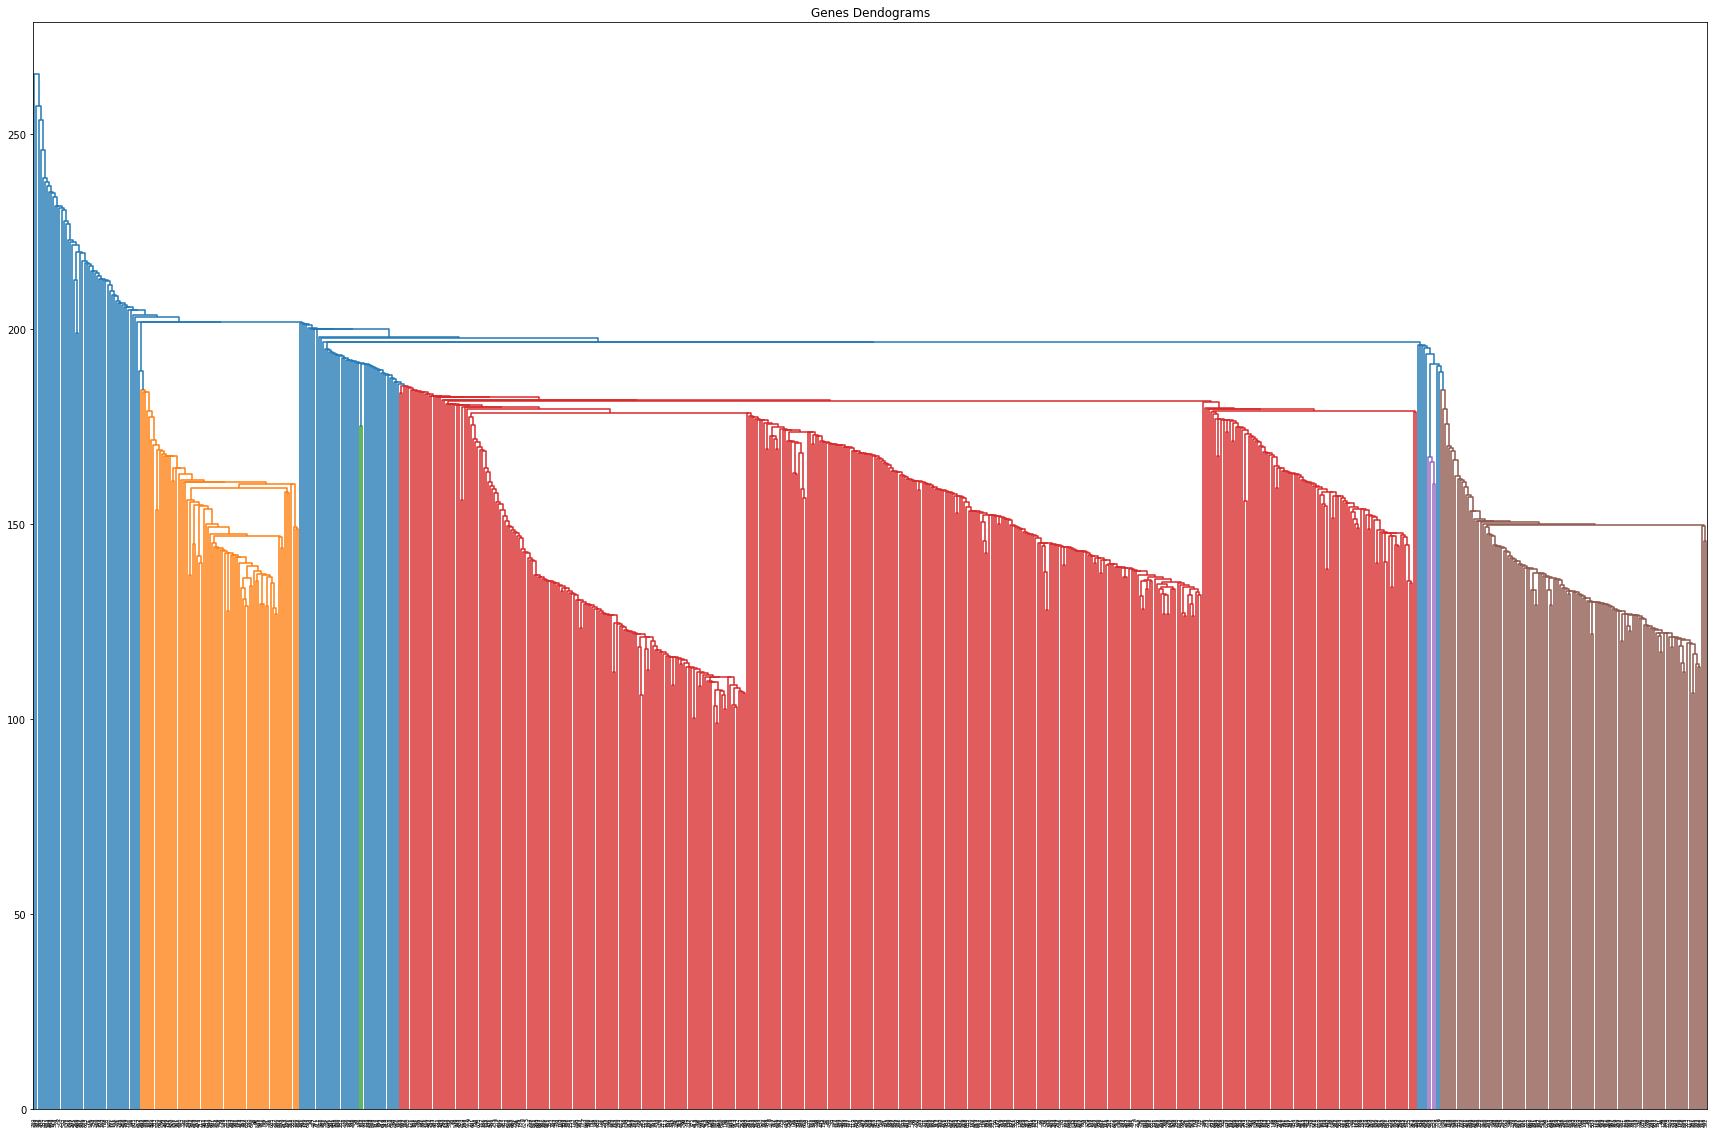

In [16]:
plt.figure(figsize=(30, 20))
plt.title("Genes Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='single', metric='minkowski'))

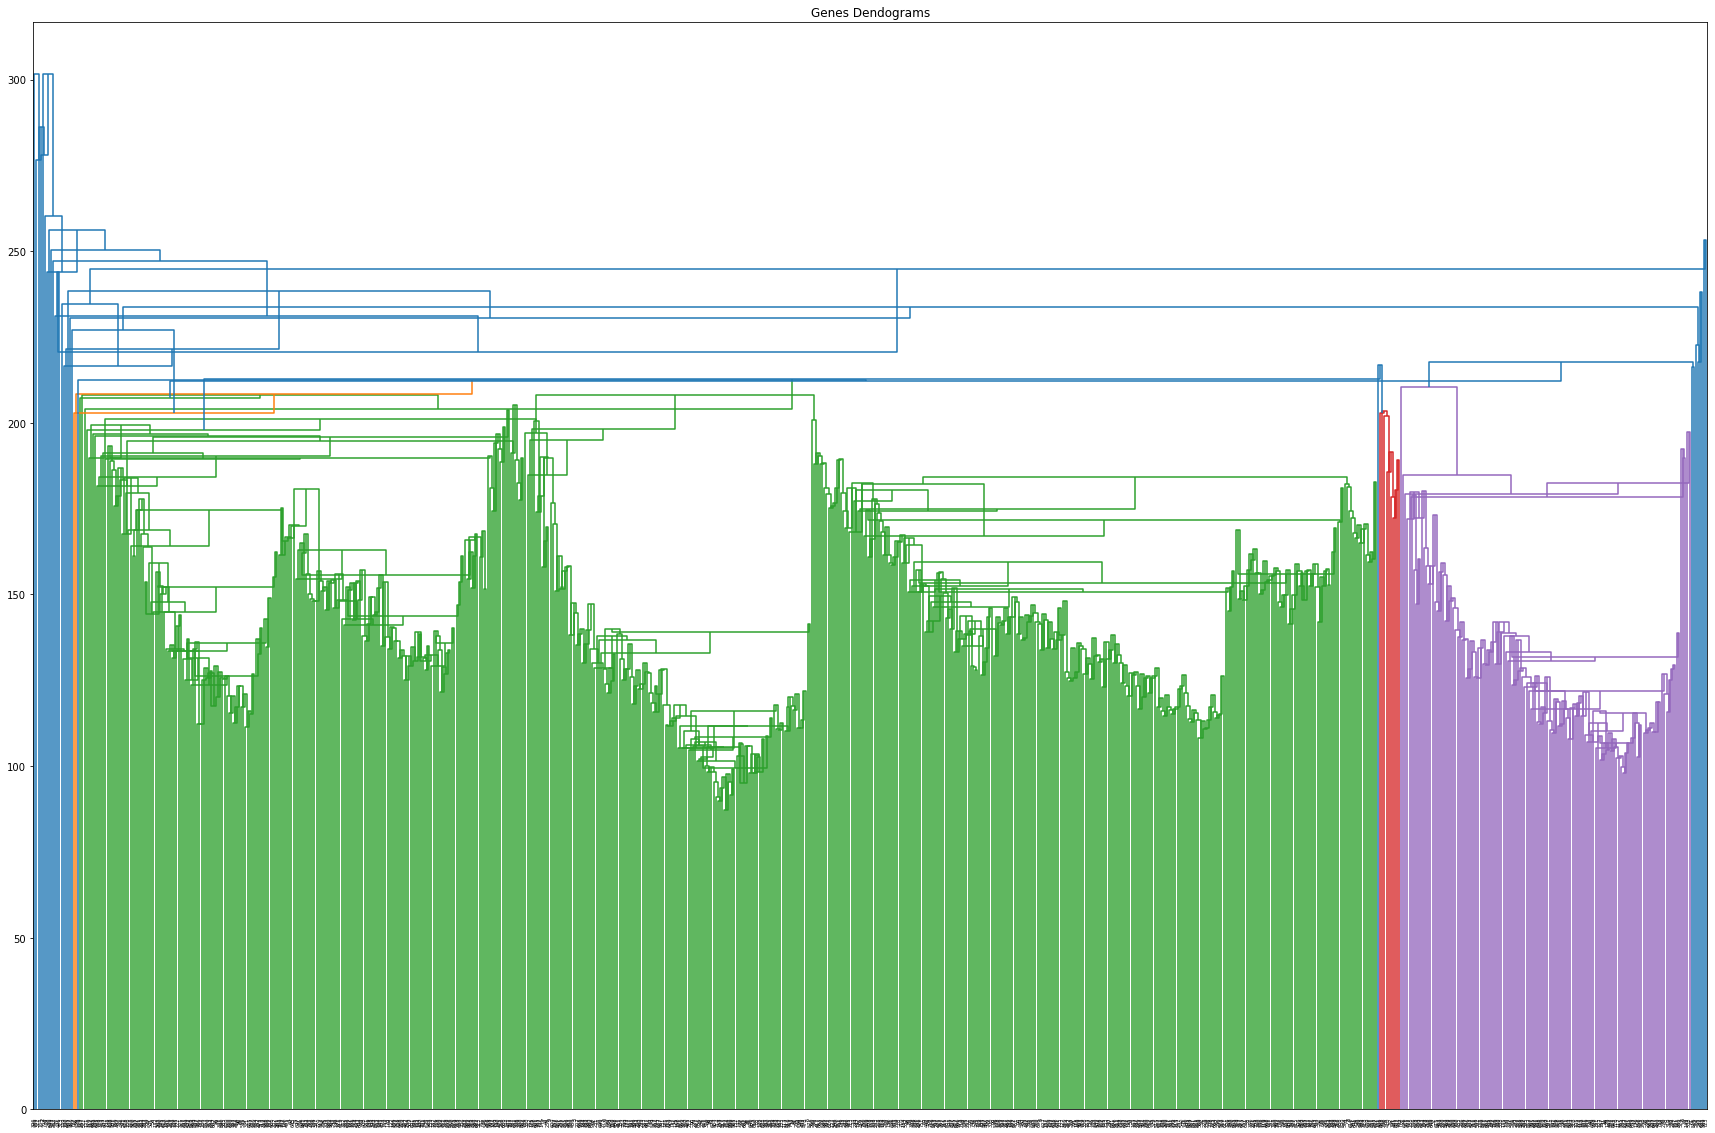

In [17]:
plt.figure(figsize=(30, 20))
plt.title("Genes Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='median', metric='euclidean'))

In [18]:
numberOfClusters=[2,3,4,5,6,7,8,9,10,15]
linkageType = ['ward', 'complete', 'average', 'single' ]
affinityType = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
from sklearn import metrics
for j in linkageType:            
    for i in numberOfClusters:
        cluster = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = j)
        cluster.fit_predict(data)
        print(i)
        print(j)
        print('ARI AGG vs initial: ', metrics.adjusted_rand_score(cluster.labels_, labels["Class"]))
        print('SIL for AGG: ', metrics.silhouette_score(data, cluster.labels_, metric='euclidean'))
        print('CH for AGG: ', metrics.calinski_harabasz_score(data, cluster.labels_))
        print('DB for AGG: ', metrics.davies_bouldin_score(data, cluster.labels_))
for k in affinityType:
    for i in numberOfClusters:
        cluster = AgglomerativeClustering(n_clusters=i, affinity = k, linkage = 'complete')
        cluster.fit_predict(data)
        print(i)
        print(k)
        print('ARI AGG vs initial: ', metrics.adjusted_rand_score(cluster.labels_, labels["Class"]))
        print('SIL for AGG: ', metrics.silhouette_score(data, cluster.labels_, metric='euclidean'))
        print('CH for AGG: ', metrics.calinski_harabasz_score(data, cluster.labels_))
        print('DB for AGG: ', metrics.davies_bouldin_score(data, cluster.labels_))
    


2
ward
ARI AGG vs initial:  0.2390013311584479
SIL for AGG:  0.17485870619890634
CH for AGG:  136.7578220127463
DB for AGG:  1.6810935229790915
3
ward
ARI AGG vs initial:  0.5117729569307612
SIL for AGG:  0.16909964635614874
CH for AGG:  127.91844971970137
DB for AGG:  1.8090077375630707
4
ward
ARI AGG vs initial:  0.9007110010352298
SIL for AGG:  0.2015020691266318
CH for AGG:  129.45908573126096
DB for AGG:  2.0008465372677504
5
ward
ARI AGG vs initial:  0.9869824601399302
SIL for AGG:  0.22487751125770666
CH for AGG:  124.9266253424348
DB for AGG:  1.8297643727901431
6
ward
ARI AGG vs initial:  0.8842902442608624
SIL for AGG:  0.22888941170257393
CH for AGG:  110.69731504746409
DB for AGG:  1.9155937861202137
7
ward
ARI AGG vs initial:  0.7214064749546241
SIL for AGG:  0.18200573754698013
CH for AGG:  96.29481779363546
DB for AGG:  2.4653919250659366
8
ward
ARI AGG vs initial:  0.6742514660563383
SIL for AGG:  0.16923792400007903
CH for AGG:  85.28521260809596
DB for AGG:  2.4190012

CH for AGG:  72.0706865951454
DB for AGG:  1.9958702803910768
8
l1
ARI AGG vs initial:  0.7461148699384005
SIL for AGG:  0.1562076573908199
CH for AGG:  62.80612975773866
DB for AGG:  1.956748976035359
9
l1
ARI AGG vs initial:  0.7075693853116461
SIL for AGG:  0.13238219555974146
CH for AGG:  56.121306927425486
DB for AGG:  2.432807629498146
10
l1
ARI AGG vs initial:  0.623868090811857
SIL for AGG:  0.12520446708337007
CH for AGG:  52.48653427745579
DB for AGG:  2.826606954002727
15
l1
ARI AGG vs initial:  0.6509319908872196
SIL for AGG:  0.10624754751088791
CH for AGG:  43.529743578650326
DB for AGG:  2.5812964096553066
2
l2
ARI AGG vs initial:  0.2390013311584479
SIL for AGG:  0.17485870619890634
CH for AGG:  136.7578220127463
DB for AGG:  1.6810935229790915
3
l2
ARI AGG vs initial:  0.3288775681507986
SIL for AGG:  0.1767196619006045
CH for AGG:  102.81979200176741
DB for AGG:  1.7984622231655936
4
l2
ARI AGG vs initial:  0.6800038580399156
SIL for AGG:  0.15987557695467333
CH for A

In [19]:
numberOfClusters=[2,3,4,5,6,7,8,9,10,15]
assignLabelsType = ['kmeans', 'discretize']
for i in numberOfClusters:
    for j in assignLabelsType:
        clustering = SpectralClustering(n_clusters=i, assign_labels=j,random_state=42)
        clustering.fit_predict(data)
        print(i)
        print(j)
        print('ARI SpectralClustering vs initial: ', metrics.adjusted_rand_score(clustering.labels_, labels["Class"]))
        print('SIL for SpectralClustering: ', metrics.silhouette_score(data, clustering.labels_, metric='euclidean'))
        print('CH for SpectralClustering: ', metrics.calinski_harabasz_score(data, clustering.labels_))
        print('DB for SpectralClustering: ', metrics.davies_bouldin_score(data, clustering.labels_))

D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


2
kmeans
ARI SpectralClustering vs initial:  -0.007615989870880483
SIL for SpectralClustering:  0.004643225917219414
CH for SpectralClustering:  1.0352426425891208
DB for SpectralClustering:  19.43646915868057


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


2
discretize
ARI SpectralClustering vs initial:  0.006235979999424098
SIL for SpectralClustering:  0.0012829387920747612
CH for SpectralClustering:  1.786626608480222
DB for SpectralClustering:  20.935118643112812


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


3
kmeans
ARI SpectralClustering vs initial:  0.004177191915833974
SIL for SpectralClustering:  -0.0050650261167944615
CH for SpectralClustering:  0.6318993280179879
DB for SpectralClustering:  21.84852332563065


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


3
discretize
ARI SpectralClustering vs initial:  0.003338604688916142
SIL for SpectralClustering:  -0.005915924869403221
CH for SpectralClustering:  1.162978019357474
DB for SpectralClustering:  22.01763288263103


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


4
kmeans
ARI SpectralClustering vs initial:  -0.011447538348777464
SIL for SpectralClustering:  -0.010996024369956208
CH for SpectralClustering:  1.1857645513963588
DB for SpectralClustering:  13.400091480377181


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


4
discretize
ARI SpectralClustering vs initial:  0.004195817048161184
SIL for SpectralClustering:  -0.010593989392416521
CH for SpectralClustering:  1.1951383523604837
DB for SpectralClustering:  21.750464042888467


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


5
kmeans
ARI SpectralClustering vs initial:  -0.0007466851527935933
SIL for SpectralClustering:  -0.008588278842088638
CH for SpectralClustering:  0.7614157789843207
DB for SpectralClustering:  17.23575160996689


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


5
discretize
ARI SpectralClustering vs initial:  0.00042303443670099023
SIL for SpectralClustering:  -0.011340952306755884
CH for SpectralClustering:  0.9548018550174262
DB for SpectralClustering:  20.4574111467851


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


6
kmeans
ARI SpectralClustering vs initial:  0.0025064383351417773
SIL for SpectralClustering:  -0.014052971159382215
CH for SpectralClustering:  0.8002995085991892
DB for SpectralClustering:  14.484694959165921


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


6
discretize
ARI SpectralClustering vs initial:  0.0013344354190833487
SIL for SpectralClustering:  -0.012676290518986217
CH for SpectralClustering:  0.9615414193184032
DB for SpectralClustering:  18.448386930680073


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


7
kmeans
ARI SpectralClustering vs initial:  0.003976898792582003
SIL for SpectralClustering:  -0.024388796313398096
CH for SpectralClustering:  1.0298734751775727
DB for SpectralClustering:  11.701559998957224


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


7
discretize
ARI SpectralClustering vs initial:  0.004663452427010036
SIL for SpectralClustering:  -0.020643657758568044
CH for SpectralClustering:  1.0979914029299513
DB for SpectralClustering:  18.40007629044636


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


8
kmeans
ARI SpectralClustering vs initial:  0.00899561234623826
SIL for SpectralClustering:  -0.0627036079134446
CH for SpectralClustering:  0.9625134605857896
DB for SpectralClustering:  10.72858572162907


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


8
discretize
ARI SpectralClustering vs initial:  0.00039231426590767934
SIL for SpectralClustering:  -0.01728444918718792
CH for SpectralClustering:  0.9590044164014545
DB for SpectralClustering:  17.10813688673597


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


9
kmeans
ARI SpectralClustering vs initial:  0.0018190032746994633
SIL for SpectralClustering:  -0.06236766352866475
CH for SpectralClustering:  0.8985660663351702
DB for SpectralClustering:  12.472223426862483


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


9
discretize
ARI SpectralClustering vs initial:  0.003554917292216748
SIL for SpectralClustering:  -0.027755574201951023
CH for SpectralClustering:  1.0734122822522472
DB for SpectralClustering:  15.773139400213438


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


10
kmeans
ARI SpectralClustering vs initial:  -0.0021983765699180595
SIL for SpectralClustering:  -0.07427554794097554
CH for SpectralClustering:  1.149982772981882
DB for SpectralClustering:  8.451452078123264


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


10
discretize
ARI SpectralClustering vs initial:  0.0032039641743299447
SIL for SpectralClustering:  -0.029676038474361788
CH for SpectralClustering:  1.1555924189241613
DB for SpectralClustering:  15.153487756342306


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


15
kmeans
ARI SpectralClustering vs initial:  0.00021643375305176502
SIL for SpectralClustering:  -0.13754339644973126
CH for SpectralClustering:  1.0625134668433458
DB for SpectralClustering:  10.099785844882662


D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


15
discretize
ARI SpectralClustering vs initial:  -0.0002175051300355258
SIL for SpectralClustering:  -0.03643877294907389
CH for SpectralClustering:  0.9684718143212534
DB for SpectralClustering:  13.109455476296125


In [20]:
birch = Birch(n_clusters = 5)
birch.fit_predict(data)
print('ARI Birch vs initial: ', metrics.adjusted_rand_score(birch.labels_, labels["Class"]))
print('SIL for Birch: ', metrics.silhouette_score(data, birch.labels_, metric='euclidean'))
print('CH for Birch: ', metrics.calinski_harabasz_score(data, birch.labels_))
print('DB for Birch: ', metrics.davies_bouldin_score(data, birch.labels_))

ARI Birch vs initial:  0.9869824601399302
SIL for Birch:  0.22487751125770666
CH for Birch:  124.9266253424348
DB for Birch:  1.8297643727901431


In [21]:
numberOfClusters=[2,3,4,5,6,7,8,9,10,15]
algorithmType=['auto', 'full', 'elkan']
initType = ['k-means++', 'random']
for i in numberOfClusters:
    for j in algorithmType:
        for k in initType:
            kmeans = KMeans(n_clusters = i, n_init=10,
                            init=k,random_state=42, algorithm = j)
            kmeans.fit_predict(data)
            print(i)
            print(j)
            print(k)
            print('ARI kmeans vs initial: ', metrics.adjusted_rand_score(kmeans.labels_, labels["Class"]))
            print('SIL for kmeans: ', metrics.silhouette_score(data, kmeans.labels_, metric='euclidean'))
            print('CH for kmeans: ', metrics.calinski_harabasz_score(data, kmeans.labels_))
            print('DB for kmeans: ', metrics.davies_bouldin_score(data, kmeans.labels_))

2
auto
k-means++
ARI kmeans vs initial:  0.2359073479434153
SIL for kmeans:  0.1753714865486185
CH for kmeans:  137.13115125141283
DB for kmeans:  1.6712762205145444
2
auto
random
ARI kmeans vs initial:  0.2359073479434153
SIL for kmeans:  0.1753714865486185
CH for kmeans:  137.13115125141283
DB for kmeans:  1.6712762205145444
2
full
k-means++
ARI kmeans vs initial:  0.2359073479434153
SIL for kmeans:  0.1753714865486185
CH for kmeans:  137.13115125141283
DB for kmeans:  1.6712762205145444
2
full
random
ARI kmeans vs initial:  0.2359073479434153
SIL for kmeans:  0.1753714865486185
CH for kmeans:  137.13115125141283
DB for kmeans:  1.6712762205145444
2
elkan
k-means++
ARI kmeans vs initial:  0.2359073479434153
SIL for kmeans:  0.1753714865486185
CH for kmeans:  137.13115125141283
DB for kmeans:  1.6712762205145444
2
elkan
random
ARI kmeans vs initial:  0.2359073479434153
SIL for kmeans:  0.1753714865486185
CH for kmeans:  137.13115125141283
DB for kmeans:  1.6712762205145444
3
auto
k-me

10
full
k-means++
ARI kmeans vs initial:  0.566036677768854
SIL for kmeans:  0.12796154674719695
CH for kmeans:  71.72852343639781
DB for kmeans:  2.8849864944854375
10
full
random
ARI kmeans vs initial:  0.5985922652911297
SIL for kmeans:  0.12775888074091257
CH for kmeans:  70.11159464259008
DB for kmeans:  2.7259598760562858
10
elkan
k-means++
ARI kmeans vs initial:  0.566036677768854
SIL for kmeans:  0.12796154674719695
CH for kmeans:  71.72852343639781
DB for kmeans:  2.8849864944854375
10
elkan
random
ARI kmeans vs initial:  0.5985922652911297
SIL for kmeans:  0.12775888074091257
CH for kmeans:  70.11159464259008
DB for kmeans:  2.7259598760562858
15
auto
k-means++
ARI kmeans vs initial:  0.3893713604599475
SIL for kmeans:  0.05944506805166023
CH for kmeans:  50.59838501311389
DB for kmeans:  3.3335020837857257
15
auto
random
ARI kmeans vs initial:  0.46020949301809955
SIL for kmeans:  0.049900160454709415
CH for kmeans:  49.098012321304296
DB for kmeans:  3.038286097701316
15
fu

In [22]:
print('ARI AGG vs initial: ', metrics.adjusted_rand_score(cluster.labels_, labels["Class"]))
print('ARI Birch vs initial: ', metrics.adjusted_rand_score(birch.labels_, labels["Class"]))
print('ARI SpectralClustering vs initial: ', metrics.adjusted_rand_score(clustering.labels_, labels["Class"]))
print('ARI Kmeans vs initial: ', metrics.adjusted_rand_score(kmeans.labels_, labels["Class"]))
print('ARI AGG vs Kmeans: ', metrics.adjusted_rand_score(cluster.labels_, kmeans.labels_))
print('SIL for AGG: ', metrics.silhouette_score(data, cluster.labels_, metric='euclidean'))
print('SIL for Kmeans: ', metrics.silhouette_score(data, kmeans.labels_, metric='euclidean'))
print('SIL for Birch: ', metrics.silhouette_score(data, birch.labels_, metric='euclidean'))
print('SIL for SpectralClustering: ', metrics.silhouette_score(data, birch.labels_, metric='euclidean'))
print('CH for AGG: ', metrics.calinski_harabasz_score(data, cluster.labels_))
print('CH for Kmeans: ', metrics.calinski_harabasz_score(data, kmeans.labels_))
print('CH for Birch: ', metrics.calinski_harabasz_score(data, birch.labels_))
print('CH for SpectralClustering: ', metrics.calinski_harabasz_score(data, clustering.labels_))
print('DB for AGG: ', metrics.davies_bouldin_score(data, cluster.labels_))
print('DB for Kmeans: ', metrics.davies_bouldin_score(data, kmeans.labels_))
print('DB for Birch: ', metrics.davies_bouldin_score(data, birch.labels_))
print('DB for SpectralClustering: ', metrics.davies_bouldin_score(data, clustering.labels_))

ARI AGG vs initial:  0.740890429101526
ARI Birch vs initial:  0.9869824601399302
ARI SpectralClustering vs initial:  -0.0002175051300355258
ARI Kmeans vs initial:  0.46020949301809955
ARI AGG vs Kmeans:  0.501598300341944
SIL for AGG:  0.12386240952397455
SIL for Kmeans:  0.049900160454709415
SIL for Birch:  0.22487751125770666
SIL for SpectralClustering:  0.22487751125770666
CH for AGG:  43.510225451621366
CH for Kmeans:  49.098012321304296
CH for Birch:  124.9266253424348
CH for SpectralClustering:  0.9684718143212534
DB for AGG:  2.389115849562373
DB for Kmeans:  3.038286097701316
DB for Birch:  1.8297643727901431
DB for SpectralClustering:  13.109455476296125


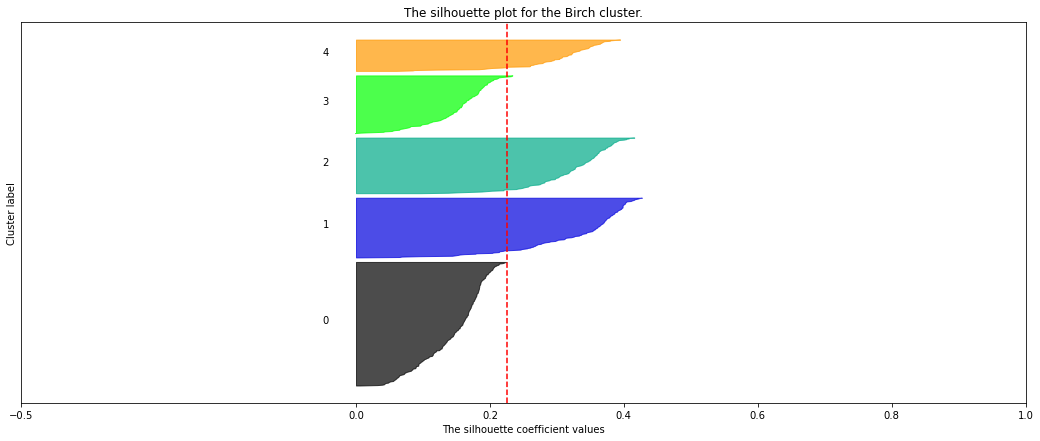

In [23]:
cluster_labels = birch.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, birch.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, birch.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the Birch cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

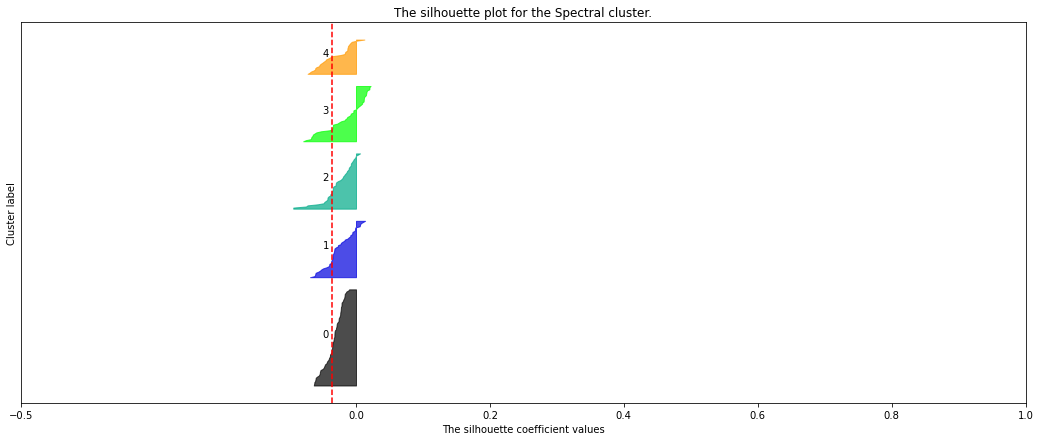

In [24]:
cluster_labels = clustering.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, clustering.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, clustering.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the Spectral cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

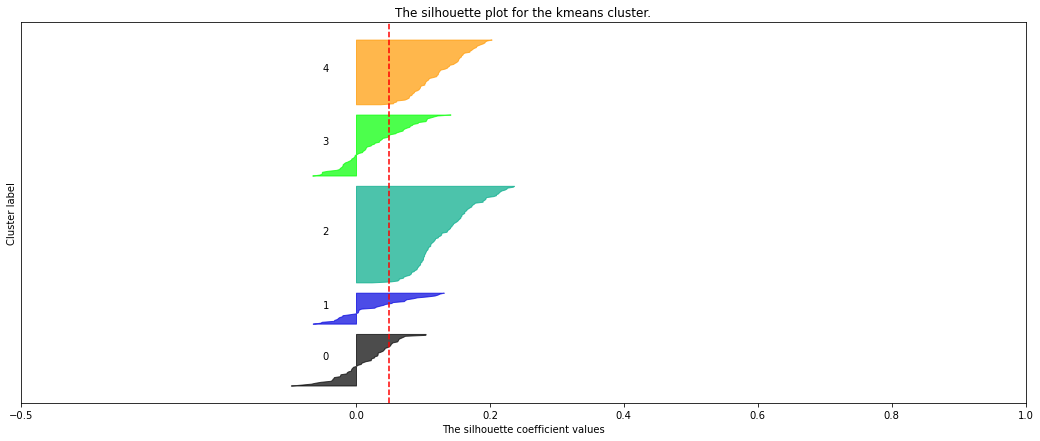

In [25]:
cluster_labels = kmeans.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, kmeans.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, kmeans.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the kmeans cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

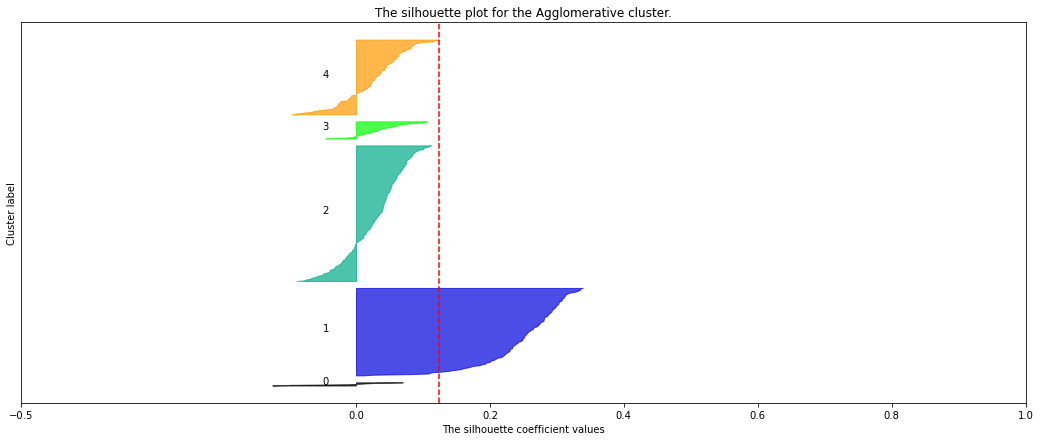

In [26]:
cluster_labels = cluster.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, cluster.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, cluster.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the Agglomerative cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [27]:
for col in data.columns:
    if data[col].max() > 20.00:
        print(data[col])

0       8.548706
1      13.378295
2      11.155881
3      12.760023
4      11.246456
         ...    
796    15.081758
797    13.925907
798    16.918211
799    10.032128
800    15.443594
Name: gene_289, Length: 801, dtype: float64
0      1.822037
1      1.913339
2      3.546746
3      8.926207
4      3.294621
         ...   
796    1.159435
797    1.650305
798    0.000000
799    7.175594
800    2.525919
Name: gene_531, Length: 801, dtype: float64
0      7.305770
1      0.000000
2      6.997315
3      4.321690
4      7.026180
         ...   
796    2.232998
797    1.380896
798    0.000000
799    9.048661
800    3.570281
Name: gene_4160, Length: 801, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
796    0.000000
797    0.000000
798    0.586693
799    0.000000
800    0.000000
Name: gene_4319, Length: 801, dtype: float64
0      12.259946
1      16.790158
2      12.552270
3      12.977851
4      17.523432
         ...    
796  

In [28]:
data['gene_289'].describe()
data['gene_531'].describe()
data['gene_4160'].describe()
data['gene_4319'].describe()
data['gene_6566'].describe()
data['gene_8318'].describe()
data['gene_9176'].describe()
data['gene_13298'].describe()
data['gene_15898'].describe()

count    801.000000
mean       3.621030
std        5.874003
min        0.000000
25%        0.400647
50%        0.925468
75%        2.577175
max       20.384155
Name: gene_15898, dtype: float64

In [29]:
data.max().max()

20.7788287118

In [30]:
data.min().min()

0.0

In [31]:
s = StandardScaler()
X_std = s.fit_transform(data)
y = labels.iloc[:,-1]

In [32]:
pca = PCA(n_components=5)
pca.fit(X_std)
X_pca = pca.transform(X_std)

lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(X_std, y)
X_lda = lda.transform(X_std)

Text(0.5, 1.0, 'PCA of MNIST dataset')

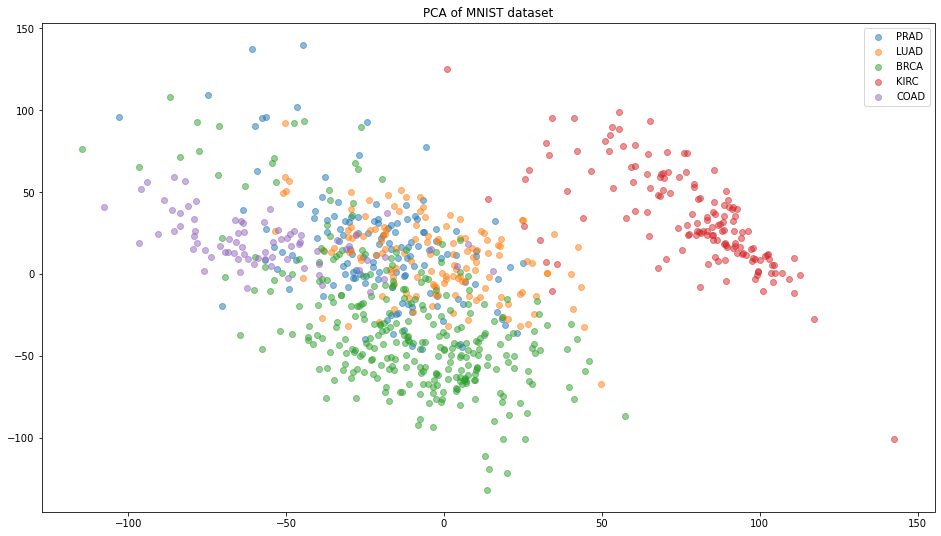

In [33]:
plt.figure(figsize=(16,9))
target_names = y.unique()
for i in target_names:
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('PCA of MNIST dataset')

Text(0.5, 1.0, 'LDA of MNIST dataset')

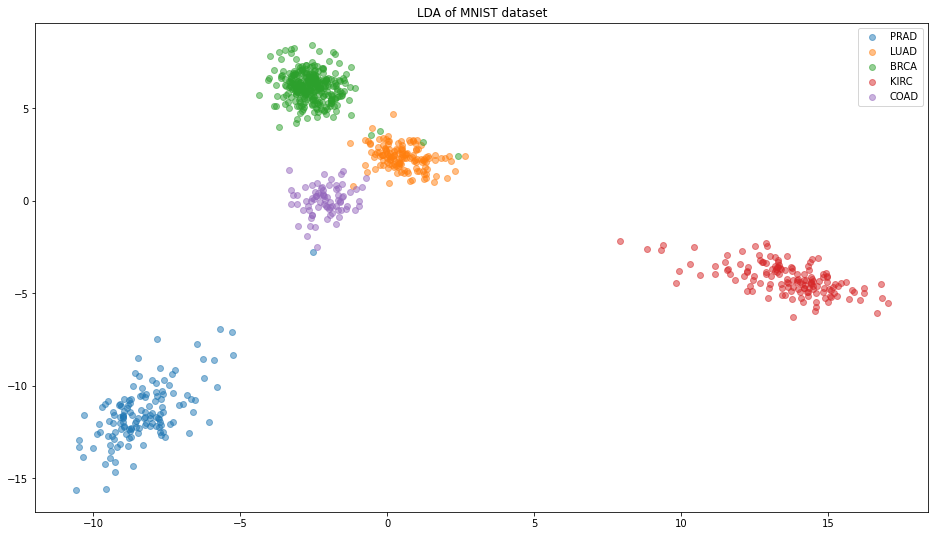

In [34]:
plt.figure(figsize=(16,9))

for i in target_names:
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('LDA of MNIST dataset')

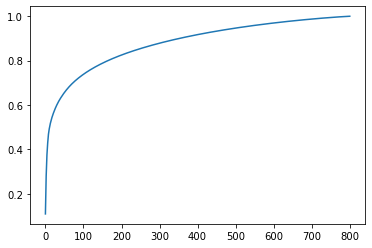

In [35]:
#zavisnost objašnjene varijanse od broja PCA komponenti
pca = PCA(n_components=None)
pca.fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [36]:
# SA PCA
pca = PCA(n_components=0.995)
pca.fit(X_std)
X_train_r = pca.transform(X_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)
X_train_r.shape

Redukovani prostor ima dimenziju:  756


(801, 756)

In [37]:
Birch = Birch(n_clusters=5)
Birch.fit_predict(X_train_r)
print(Birch.labels_)

[0 2 0 0 1 0 3 0 2 0 1 3 0 0 1 1 2 3 3 0 1 3 2 1 3 2 4 1 2 2 1 1 3 0 0 1 3
 2 1 0 3 0 0 3 3 1 0 4 1 2 1 2 2 0 4 2 1 4 3 1 2 3 1 2 0 4 1 0 3 2 3 1 1 2
 2 2 1 3 0 4 1 0 1 1 0 0 1 1 3 2 0 0 1 0 1 0 4 1 0 1 1 3 1 3 2 3 2 4 2 2 0
 1 2 0 1 3 3 3 1 1 2 3 2 1 0 0 0 1 3 2 4 2 4 1 1 3 2 1 3 4 1 0 1 3 2 4 0 1
 2 2 2 2 1 1 2 1 1 0 0 2 0 2 3 1 0 2 4 3 2 1 3 2 1 2 1 1 1 0 1 3 4 3 1 0 0
 0 2 2 1 2 2 3 2 0 2 1 0 1 2 2 1 3 3 3 3 0 2 0 1 2 2 1 0 1 0 1 1 1 2 1 3 2
 3 3 2 1 3 0 1 2 2 0 4 0 3 0 3 4 2 3 3 2 0 1 2 2 3 1 2 4 2 0 4 1 0 3 0 0 0
 1 4 4 2 4 4 0 2 2 1 3 3 1 4 0 3 0 1 1 3 1 2 2 0 2 2 1 1 1 3 3 3 3 0 1 1 3
 1 1 2 0 1 1 4 2 0 1 1 1 4 1 0 1 4 2 2 0 3 1 3 3 2 4 3 1 1 2 2 3 1 1 0 2 3
 1 2 0 3 1 0 4 1 1 1 2 2 2 1 1 0 2 1 3 1 4 4 2 1 3 1 1 1 4 2 4 3 0 3 1 1 3
 2 4 0 2 0 0 3 0 1 4 3 3 4 4 0 1 1 4 3 2 0 2 1 1 2 2 1 2 2 3 4 0 1 2 0 1 2
 1 2 1 2 0 1 0 4 1 2 1 2 2 1 1 1 3 2 0 1 0 3 1 3 4 1 0 2 3 1 1 3 1 2 2 2 0
 4 1 3 2 0 1 0 1 1 2 1 3 2 1 3 1 1 2 2 3 4 0 4 1 3 3 1 0 3 4 2 2 1 0 0 2 0
 2 3 0 1 2 0 2 1 1 4 2 3 

In [38]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train_r)
print(cluster.labels_)

[0 2 0 0 1 0 3 0 2 0 1 3 0 0 1 1 2 3 3 0 1 3 2 1 3 2 4 1 2 2 1 1 3 0 0 1 3
 2 1 0 3 0 0 3 3 1 0 4 1 2 1 2 2 0 4 2 1 4 3 1 2 3 1 2 0 4 1 0 3 2 3 1 1 2
 2 2 1 3 0 4 1 0 1 1 0 0 1 1 3 2 0 0 1 0 1 0 4 1 0 1 1 3 1 3 2 3 2 4 2 2 0
 1 2 0 1 3 3 3 1 1 2 3 2 1 0 0 0 1 3 2 4 2 4 1 1 3 2 1 3 4 1 0 1 3 2 4 0 1
 2 2 2 2 1 1 2 1 1 0 0 2 0 2 3 1 0 2 4 3 2 1 3 2 1 2 1 1 1 0 1 3 4 3 1 0 0
 0 2 2 1 2 2 3 2 0 2 1 0 1 2 2 1 3 3 3 3 0 2 0 1 2 2 1 0 1 0 1 1 1 2 1 3 2
 3 3 2 1 3 0 1 2 2 0 4 0 3 0 3 4 2 3 3 2 0 1 2 2 3 1 2 4 2 0 4 1 0 3 0 0 0
 1 4 4 2 4 4 0 2 2 1 3 3 1 4 0 3 0 1 1 3 1 2 2 0 2 2 1 1 1 3 3 3 3 0 1 1 3
 1 1 2 0 1 1 4 2 0 1 1 1 4 1 0 1 4 2 2 0 3 1 3 3 2 4 3 1 1 2 2 3 1 1 0 2 3
 1 2 0 3 1 0 4 1 1 1 2 2 2 1 1 0 2 1 3 1 4 4 2 1 3 1 1 1 4 2 4 3 0 3 1 1 3
 2 4 0 2 0 0 3 0 1 4 3 3 4 4 0 1 1 4 3 2 0 2 1 1 2 2 1 2 2 3 4 0 1 2 0 1 2
 1 2 1 2 0 1 0 4 1 2 1 2 2 1 1 1 3 2 0 1 0 3 1 3 4 1 0 2 3 1 1 3 1 2 2 2 0
 4 1 3 2 0 1 0 1 1 2 1 3 2 1 3 1 1 2 2 3 4 0 4 1 3 3 1 0 3 4 2 2 1 0 0 2 0
 2 3 0 1 2 0 2 1 1 4 2 3 

In [39]:
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize",random_state=42)
clustering.fit_predict(X_train_r)
print(cluster.labels_)

[0 2 0 0 1 0 3 0 2 0 1 3 0 0 1 1 2 3 3 0 1 3 2 1 3 2 4 1 2 2 1 1 3 0 0 1 3
 2 1 0 3 0 0 3 3 1 0 4 1 2 1 2 2 0 4 2 1 4 3 1 2 3 1 2 0 4 1 0 3 2 3 1 1 2
 2 2 1 3 0 4 1 0 1 1 0 0 1 1 3 2 0 0 1 0 1 0 4 1 0 1 1 3 1 3 2 3 2 4 2 2 0
 1 2 0 1 3 3 3 1 1 2 3 2 1 0 0 0 1 3 2 4 2 4 1 1 3 2 1 3 4 1 0 1 3 2 4 0 1
 2 2 2 2 1 1 2 1 1 0 0 2 0 2 3 1 0 2 4 3 2 1 3 2 1 2 1 1 1 0 1 3 4 3 1 0 0
 0 2 2 1 2 2 3 2 0 2 1 0 1 2 2 1 3 3 3 3 0 2 0 1 2 2 1 0 1 0 1 1 1 2 1 3 2
 3 3 2 1 3 0 1 2 2 0 4 0 3 0 3 4 2 3 3 2 0 1 2 2 3 1 2 4 2 0 4 1 0 3 0 0 0
 1 4 4 2 4 4 0 2 2 1 3 3 1 4 0 3 0 1 1 3 1 2 2 0 2 2 1 1 1 3 3 3 3 0 1 1 3
 1 1 2 0 1 1 4 2 0 1 1 1 4 1 0 1 4 2 2 0 3 1 3 3 2 4 3 1 1 2 2 3 1 1 0 2 3
 1 2 0 3 1 0 4 1 1 1 2 2 2 1 1 0 2 1 3 1 4 4 2 1 3 1 1 1 4 2 4 3 0 3 1 1 3
 2 4 0 2 0 0 3 0 1 4 3 3 4 4 0 1 1 4 3 2 0 2 1 1 2 2 1 2 2 3 4 0 1 2 0 1 2
 1 2 1 2 0 1 0 4 1 2 1 2 2 1 1 1 3 2 0 1 0 3 1 3 4 1 0 2 3 1 1 3 1 2 2 2 0
 4 1 3 2 0 1 0 1 1 2 1 3 2 1 3 1 1 2 2 3 4 0 4 1 3 3 1 0 3 4 2 2 1 0 0 2 0
 2 3 0 1 2 0 2 1 1 4 2 3 

D:\Faks\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [40]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=3000, 
                init='k-means++',random_state=42)
kmeans.fit_predict(X_train_r)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-2.14796648e+01  1.60427492e+01  7.04893205e+01 ... -3.94955372e-03
   2.42439493e-02  2.73736776e-03]
 [ 7.88280177e+01  3.28461047e+01 -9.77884453e+00 ...  1.92027142e-03
   1.14116221e-02 -3.90256039e-03]
 [-6.42393744e+00 -4.56291439e+01  3.60480520e+00 ...  1.74146205e-02
  -3.89388320e-02 -8.74150763e-03]
 [-6.04053323e+01  2.00147733e+01 -5.60421520e+01 ...  1.46601730e-02
  -2.36317744e-02 -1.27710450e-02]
 [-1.20451282e+01  1.53096747e+01 -2.40778763e+01 ... -2.60592301e-02
   3.31230981e-02  1.67115360e-02]]
[0 4 0 0 2 0 1 0 2 0 2 1 0 4 2 2 4 1 1 0 2 1 4 2 1 4 3 2 4 2 2 2 1 4 0 2 1
 4 2 4 1 0 0 1 1 2 0 3 2 4 2 4 2 0 3 4 2 3 1 2 4 4 2 4 0 3 2 0 1 4 1 2 4 4
 2 4 2 4 0 3 2 0 2 2 0 0 2 2 1 4 0 0 2 4 2 0 3 2 0 2 2 1 2 1 4 1 4 3 4 4 0
 2 4 0 2 1 1 1 2 2 4 1 4 2 0 0 0 2 1 2 3 4 3 2 2 1 4 2 1 3 2 0 2 1 4 3 0 2
 4 4 4 4 2 2 4 2 2 0 0 4 0 4 1 2 0 4 3 1 4 2 1 4 2 4 2 4 2 0 2 1 3 1 2 0 0
 0 4 4 2 4 4 1 4 0 4 2 4 2 4 4 2 1 1 1 1 0 4 0 4 4 4 2 0 2 0 2 2 2 4 2 1 4
 1 1 4 2 1 0 2 4 4 0 3 4

In [50]:
print('ARI AGG vs initial: ', metrics.adjusted_rand_score(cluster.labels_, labels["Class"]))
print('ARI Birch vs initial: ', metrics.adjusted_rand_score(Birch.labels_, labels["Class"]))
print('ARI SpectralClustering vs initial: ', metrics.adjusted_rand_score(clustering.labels_, labels["Class"]))
print('ARI Kmeans vs initial: ', metrics.adjusted_rand_score(kmeans.labels_, labels["Class"]))
print('ARI AGG vs Kmeans: ', metrics.adjusted_rand_score(cluster.labels_, kmeans.labels_))
print('SIL for AGG: ', metrics.silhouette_score(data, cluster.labels_, metric='euclidean'))
print('SIL for Kmeans: ', metrics.silhouette_score(data, kmeans.labels_, metric='euclidean'))
print('SIL for Birch: ', metrics.silhouette_score(data, Birch.labels_, metric='euclidean'))
print('SIL for SpectralClustering: ', metrics.silhouette_score(data, Birch.labels_, metric='euclidean'))
print('CH for AGG: ', metrics.calinski_harabasz_score(data, cluster.labels_))
print('CH for Kmeans: ', metrics.calinski_harabasz_score(data, kmeans.labels_))
print('CH for Birch: ', metrics.calinski_harabasz_score(data, Birch.labels_))
print('CH for SpectralClustering: ', metrics.calinski_harabasz_score(data, clustering.labels_))
print('DB for AGG: ', metrics.davies_bouldin_score(data, cluster.labels_))
print('DB for Kmeans: ', metrics.davies_bouldin_score(data, kmeans.labels_))
print('DB for Birch: ', metrics.davies_bouldin_score(data, Birch.labels_))
print('DB for SpectralClustering: ', metrics.davies_bouldin_score(data, clustering.labels_))

ARI AGG vs initial:  0.9962525711260065
ARI Birch vs initial:  0.7832796131894106
ARI SpectralClustering vs initial:  0.912277158087736
ARI Kmeans vs initial:  0.9963004101833715
ARI AGG vs Kmeans:  0.9925531401029228
SIL for AGG:  0.22422639642322917
SIL for Kmeans:  0.2242527745345087
SIL for Birch:  0.2081409881595791
SIL for SpectralClustering:  0.2081409881595791
CH for AGG:  124.55884921634429
CH for Kmeans:  124.54205170405717
CH for Birch:  117.41371153286354
CH for SpectralClustering:  85.99374014849698
DB for AGG:  1.839680110416286
DB for Kmeans:  1.836000908488869
DB for Birch:  2.000385241221426
DB for SpectralClustering:  2.0227807996981975


In [42]:
# SA LDA
lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(X_std, y)
X_train_r = lda.transform(X_std)
X_train_r.shape

(801, 4)

In [94]:
from sklearn.cluster import Birch
Birch = Birch(n_clusters=5)
Birch.fit_predict(X_train_r)
print(Birch.labels_)

[1 3 1 1 4 1 2 1 4 1 4 2 1 4 4 4 3 2 2 1 4 2 3 4 2 3 0 4 4 4 4 4 2 4 1 4 2
 3 4 4 2 1 1 2 2 4 1 0 4 3 4 3 4 1 0 4 4 0 2 4 3 2 4 3 1 0 4 1 2 4 2 4 4 3
 4 3 4 2 1 0 4 1 4 4 1 1 4 4 2 4 1 1 4 4 4 1 0 4 1 4 4 2 4 2 3 2 3 0 3 3 1
 4 3 1 4 2 2 2 4 4 3 2 3 4 1 1 1 4 2 3 0 4 0 4 4 2 3 4 2 0 4 1 4 2 3 0 1 4
 3 3 3 3 4 4 3 4 4 1 1 3 1 3 2 4 1 3 0 2 3 4 2 3 4 3 4 4 4 1 4 2 0 2 4 1 1
 1 3 3 4 3 3 2 3 1 3 4 4 4 3 3 4 2 2 2 2 1 4 1 4 3 3 4 1 4 1 4 4 4 3 4 2 3
 2 2 3 4 2 1 4 3 3 1 0 4 2 1 2 0 4 2 2 3 1 4 3 3 2 4 4 0 4 1 0 4 1 2 1 1 1
 4 0 0 3 0 0 1 3 4 4 2 2 4 0 1 2 1 4 4 2 4 4 4 4 3 3 4 4 4 2 2 2 2 4 4 4 2
 4 4 3 1 4 4 0 3 1 4 4 4 0 4 1 4 0 3 3 1 2 4 2 2 3 0 2 4 4 4 4 2 4 4 1 4 2
 4 3 1 2 4 1 0 4 4 4 3 3 3 4 4 1 3 4 2 4 0 0 3 4 2 4 4 4 0 3 0 2 1 2 4 4 2
 4 0 1 3 1 4 2 1 4 0 2 2 0 0 1 4 4 0 2 4 1 4 4 4 3 3 2 3 4 2 0 1 4 3 1 4 4
 4 3 4 4 1 4 1 0 4 3 4 4 3 4 4 4 2 3 1 4 1 2 4 2 0 4 1 3 2 4 4 2 4 3 4 4 1
 0 4 2 3 1 4 1 4 4 4 4 2 3 4 2 4 4 3 3 2 0 1 0 4 2 2 4 1 2 0 3 3 4 1 1 4 1
 3 2 1 4 3 1 3 4 4 0 3 2 

In [95]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train_r)
print(cluster.labels_)

[2 4 2 2 3 2 1 2 3 2 3 1 2 3 3 3 4 1 1 2 3 1 4 3 1 4 0 3 3 3 3 3 1 3 2 3 1
 4 3 3 1 2 2 1 1 3 2 0 3 4 3 4 3 2 0 3 3 0 1 3 4 1 3 4 2 0 3 2 1 3 1 3 3 4
 3 4 3 1 2 0 3 2 3 3 2 2 3 3 1 3 2 2 3 3 3 2 0 3 2 3 3 1 3 1 4 1 4 0 4 4 2
 3 4 2 3 1 1 1 3 3 4 1 4 3 2 2 2 3 1 4 0 3 0 3 3 1 4 3 1 0 3 2 3 1 4 0 2 3
 4 4 4 4 3 3 4 3 3 2 2 4 2 4 1 3 2 4 0 1 4 3 1 4 3 4 3 3 3 2 3 1 0 1 3 2 2
 2 4 4 3 4 4 1 4 2 4 3 3 3 4 4 3 1 1 1 1 2 3 2 3 4 4 3 2 3 2 3 3 3 4 3 1 4
 1 1 4 3 1 2 3 4 4 2 0 3 1 2 1 0 3 1 1 4 2 2 4 4 1 3 3 0 3 2 0 3 2 1 2 2 2
 3 0 0 4 0 0 2 4 3 3 1 1 3 0 2 1 2 3 3 1 3 3 3 3 4 4 3 3 3 1 1 1 1 3 3 3 1
 3 3 4 2 3 3 0 4 2 3 3 3 0 3 2 3 0 4 4 2 1 3 1 1 4 0 1 3 3 3 4 1 3 3 2 3 1
 3 4 2 1 3 2 0 3 3 3 4 4 4 3 3 2 4 3 1 3 0 0 4 3 1 3 3 3 0 4 0 1 2 1 3 3 1
 3 0 2 4 2 3 1 2 3 0 1 1 0 0 2 3 3 0 1 3 2 3 3 3 4 4 1 4 3 1 0 2 3 4 2 3 3
 3 4 3 3 2 3 2 0 3 4 3 3 4 3 3 3 1 4 2 3 2 1 3 1 0 3 2 4 1 3 3 1 3 4 3 3 2
 0 3 1 4 2 3 2 3 3 3 3 1 4 3 1 3 3 4 4 1 0 2 0 3 1 1 3 2 1 0 4 4 3 2 2 3 2
 4 1 2 3 4 2 4 3 3 0 4 1 

In [96]:
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize",random_state=42)
clustering.fit_predict(X_train_r)
print(cluster.labels_)

[2 4 2 2 3 2 1 2 3 2 3 1 2 3 3 3 4 1 1 2 3 1 4 3 1 4 0 3 3 3 3 3 1 3 2 3 1
 4 3 3 1 2 2 1 1 3 2 0 3 4 3 4 3 2 0 3 3 0 1 3 4 1 3 4 2 0 3 2 1 3 1 3 3 4
 3 4 3 1 2 0 3 2 3 3 2 2 3 3 1 3 2 2 3 3 3 2 0 3 2 3 3 1 3 1 4 1 4 0 4 4 2
 3 4 2 3 1 1 1 3 3 4 1 4 3 2 2 2 3 1 4 0 3 0 3 3 1 4 3 1 0 3 2 3 1 4 0 2 3
 4 4 4 4 3 3 4 3 3 2 2 4 2 4 1 3 2 4 0 1 4 3 1 4 3 4 3 3 3 2 3 1 0 1 3 2 2
 2 4 4 3 4 4 1 4 2 4 3 3 3 4 4 3 1 1 1 1 2 3 2 3 4 4 3 2 3 2 3 3 3 4 3 1 4
 1 1 4 3 1 2 3 4 4 2 0 3 1 2 1 0 3 1 1 4 2 2 4 4 1 3 3 0 3 2 0 3 2 1 2 2 2
 3 0 0 4 0 0 2 4 3 3 1 1 3 0 2 1 2 3 3 1 3 3 3 3 4 4 3 3 3 1 1 1 1 3 3 3 1
 3 3 4 2 3 3 0 4 2 3 3 3 0 3 2 3 0 4 4 2 1 3 1 1 4 0 1 3 3 3 4 1 3 3 2 3 1
 3 4 2 1 3 2 0 3 3 3 4 4 4 3 3 2 4 3 1 3 0 0 4 3 1 3 3 3 0 4 0 1 2 1 3 3 1
 3 0 2 4 2 3 1 2 3 0 1 1 0 0 2 3 3 0 1 3 2 3 3 3 4 4 1 4 3 1 0 2 3 4 2 3 3
 3 4 3 3 2 3 2 0 3 4 3 3 4 3 3 3 1 4 2 3 2 1 3 1 0 3 2 4 1 3 3 1 3 4 3 3 2
 0 3 1 4 2 3 2 3 3 3 3 1 4 3 1 3 3 4 4 1 0 2 0 3 1 1 3 2 1 0 4 4 3 2 2 3 2
 4 1 2 3 4 2 4 3 3 0 4 1 

In [97]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=3000, 
                init='k-means++',random_state=42)
kmeans.fit_predict(X_train_r)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ -8.34034752 -11.50700798   2.51969546  -0.31355056]
 [ -2.55938218   6.09869388   3.53822179   1.58724726]
 [  0.50166101   2.34671746  -4.39525349  -8.00783902]
 [ 13.62478128  -4.20794968   1.83946405   1.25989427]
 [ -2.09783744   0.01554759 -13.51275198   6.53498254]]
[0 2 0 0 1 0 3 0 1 0 1 3 0 1 1 1 2 3 3 0 1 3 2 1 3 2 4 1 1 1 1 1 3 1 0 1 3
 2 1 1 3 0 0 3 3 1 0 4 1 2 1 2 1 0 4 1 1 4 3 1 2 3 1 2 0 4 1 0 3 1 3 1 1 2
 1 2 1 3 0 4 1 0 1 1 0 0 1 1 3 1 0 0 1 1 1 0 4 1 0 1 1 3 1 3 2 3 2 4 2 2 0
 1 2 0 1 3 3 3 1 1 2 3 2 1 0 0 0 1 3 2 4 1 4 1 1 3 2 1 3 4 1 0 1 3 2 4 0 1
 2 2 2 2 1 1 2 1 1 0 0 2 0 2 3 1 0 2 4 3 2 1 3 2 1 2 1 1 1 0 1 3 4 3 1 0 0
 0 2 2 1 2 2 3 2 0 2 1 1 1 2 2 1 3 3 3 3 0 1 0 1 2 2 1 0 1 0 1 1 1 2 1 3 2
 3 3 2 1 3 0 1 2 2 0 4 1 3 0 3 4 1 3 3 2 0 1 2 2 3 1 1 4 1 0 4 1 0 3 0 0 0
 1 4 4 2 4 4 0 2 1 1 3 3 1 4 0 3 0 1 1 3 1 1 1 1 2 2 1 1 1 3 3 3 3 1 1 1 3
 1 1 2 0 1 1 4 2 0 1 1 1 4 1 0 1 4 2 2 0 3 1 3 3 2 4 3 1 1 1 1 3 1 1 0 1 3
 1 2 0 3 1 0 4 1 1 1 2 2 2 1 1 0 2 1 3 1 4 4 2 1 

In [98]:
print('ARI AGG vs initial: ', metrics.adjusted_rand_score(cluster.labels_, labels["Class"]))
print('ARI Birch vs initial: ', metrics.adjusted_rand_score(Birch.labels_, labels["Class"]))
print('ARI SpectralClustering vs initial: ', metrics.adjusted_rand_score(clustering.labels_, labels["Class"]))
print('ARI Kmeans vs initial: ', metrics.adjusted_rand_score(kmeans.labels_, labels["Class"]))
print('ARI AGG vs Kmeans: ', metrics.adjusted_rand_score(cluster.labels_, kmeans.labels_))
print('SIL for AGG: ', metrics.silhouette_score(data, cluster.labels_, metric='euclidean'))
print('SIL for Kmeans: ', metrics.silhouette_score(data, kmeans.labels_, metric='euclidean'))
print('SIL for Birch: ', metrics.silhouette_score(data, Birch.labels_, metric='euclidean'))
print('SIL for SpectralClustering: ', metrics.silhouette_score(data, Birch.labels_, metric='euclidean'))
print('CH for AGG: ', metrics.calinski_harabasz_score(data, cluster.labels_))
print('CH for Kmeans: ', metrics.calinski_harabasz_score(data, kmeans.labels_))
print('CH for Birch: ', metrics.calinski_harabasz_score(data, Birch.labels_))
print('CH for SpectralClustering: ', metrics.calinski_harabasz_score(data, clustering.labels_))
print('DB for AGG: ', metrics.davies_bouldin_score(data, cluster.labels_))
print('DB for Kmeans: ', metrics.davies_bouldin_score(data, kmeans.labels_))
print('DB for Birch: ', metrics.davies_bouldin_score(data, Birch.labels_))
print('DB for SpectralClustering: ', metrics.davies_bouldin_score(data, clustering.labels_))

ARI AGG vs initial:  0.9962525711260065
ARI Birch vs initial:  0.9963004101833715
ARI SpectralClustering vs initial:  0.912277158087736
ARI Kmeans vs initial:  0.9963004101833715
ARI AGG vs Kmeans:  0.9925531401029228
SIL for AGG:  0.22422639642322917
SIL for Kmeans:  0.2242527745345087
SIL for Birch:  0.2242527745345087
SIL for SpectralClustering:  0.2242527745345087
CH for AGG:  124.55884921634429
CH for Kmeans:  124.54205170405717
CH for Birch:  124.54205170405717
CH for SpectralClustering:  85.99374014849698
DB for AGG:  1.839680110416286
DB for Kmeans:  1.8360009084888673
DB for Birch:  1.8360009084890039
DB for SpectralClustering:  2.0227807996981975


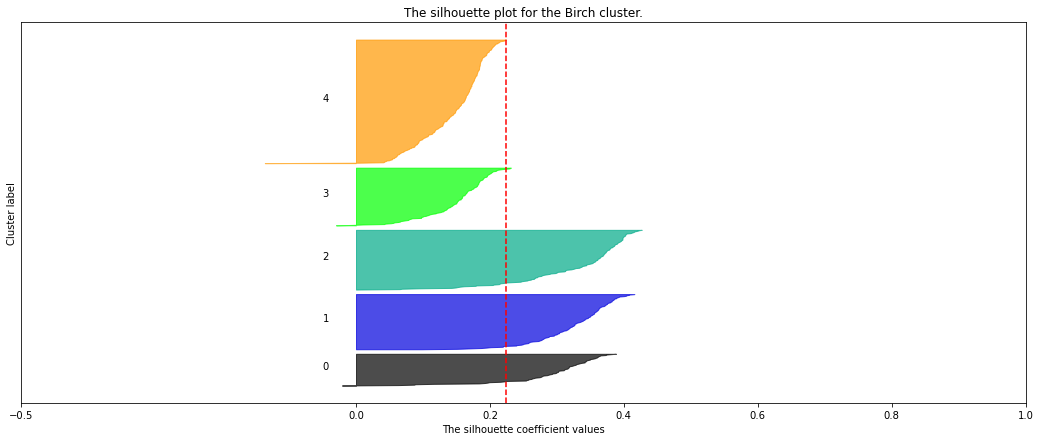

In [99]:
cluster_labels = Birch.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, Birch.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, Birch.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
Birch
ax1.set_title("The silhouette plot for the Birch cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

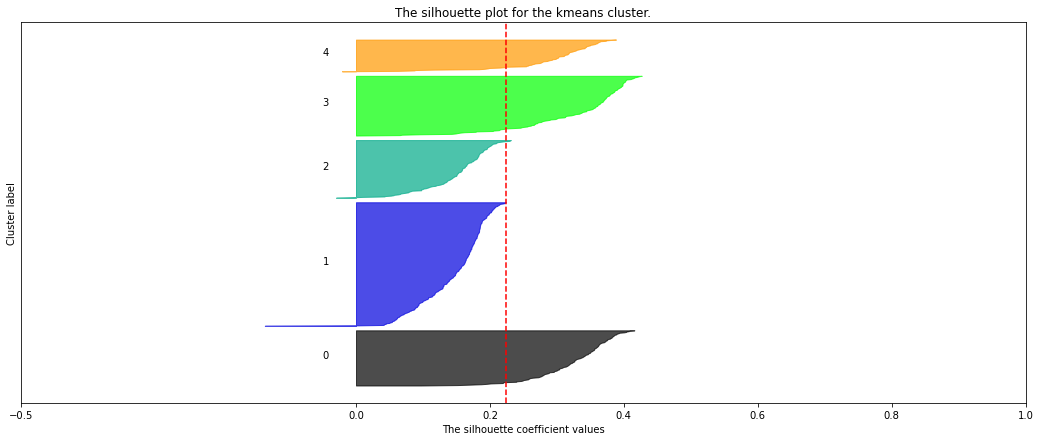

In [100]:
cluster_labels = kmeans.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, kmeans.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, kmeans.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the kmeans cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

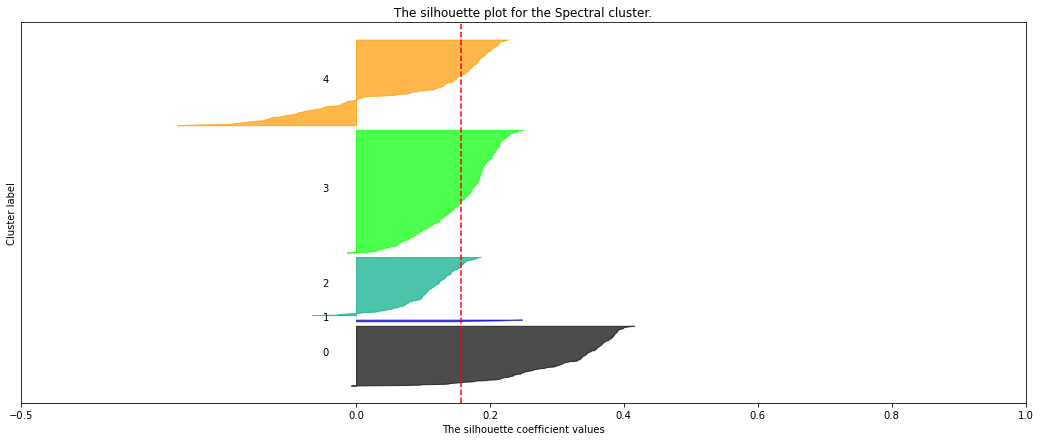

In [101]:
cluster_labels = clustering.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, clustering.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, clustering.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the Spectral cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

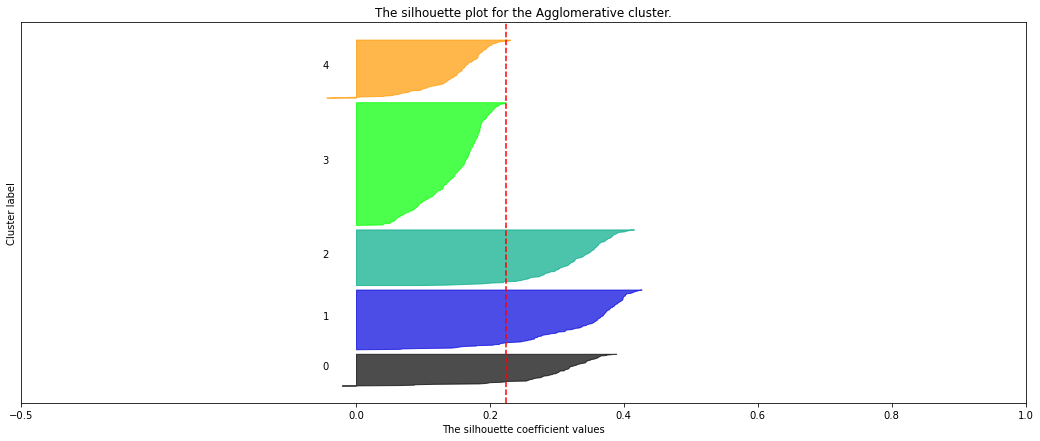

In [102]:
cluster_labels = cluster.labels_
n_clusters = 5
silhouette_avg = metrics.silhouette_score(data, cluster.labels_)
sample_silhouette_values = metrics.silhouette_samples(data, cluster.labels_, metric='euclidean')
y_lower = 10
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the Agglomerative cluster.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [103]:
result = np.where(Birch.labels_ == 0)
result

(array([ 26,  47,  54,  57,  65,  79,  96, 107, 130, 132, 139, 145, 166,
        180, 232, 237, 249, 252, 260, 261, 263, 264, 272, 302, 308, 312,
        321, 339, 353, 354, 361, 363, 371, 379, 382, 383, 387, 400, 414,
        431, 444, 464, 466, 473, 490, 493, 501, 503, 510, 530, 531, 539,
        542, 553, 561, 570, 585, 588, 590, 597, 607, 613, 618, 634, 650,
        652, 662, 665, 670, 692, 693, 713, 732, 745, 755, 766, 767, 798],
       dtype=int64),)

In [104]:
a = data.loc[result[0][0]]

In [105]:
class0 = data.iloc[result[0]]

In [106]:
class0.describe()

gene_1     gene_2     gene_3     gene_4     gene_6     gene_7  \
count  78.000000  78.000000  78.000000  78.000000  78.000000  78.000000   
mean    3.438381   3.238618   7.830324   9.933747   7.292393   0.509116   
std     0.939768   0.817924   0.474268   0.394547   0.775577   0.535089   
min     0.000000   0.000000   6.904111   9.113458   5.051677   0.000000   
25%     2.905370   2.773876   7.588275   9.624025   6.906614   0.000000   
50%     3.525609   3.303540   7.838131   9.961748   7.486054   0.517017   
75%     4.055524   3.716405   8.097853  10.204983   7.880883   0.749800   
max     5.215950   5.151839   9.173387  10.954603   8.745140   1.972509   

         gene_10    gene_11    gene_12    gene_13  ...  gene_20521  \
count  78.000000  78.000000  78.000000  78.000000  ...   78.000000   
mean    0.357278   1.072523   2.544032   0.039495  ...    5.473999   
std     1.299691   1.155412   0.689873   0.159611  ...    0.751078   
min     0.000000   0.000000   0.851599   0.000000  ...    3.272068   
25%     0.000000   0.506602   2.173503   0.000000  ...    4.942564   
50%     0.000000   0.750072   2.547433   0.000000  ...    5.680821   
75%     0.000000   1.565937   2.941546   0.000000  ...    5.936885   
max     7.448149   7.884439   3.986156   0.990447  ...    6.935224   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count   78.000000   78.000000   78.000000   78.000000   78.000000   78.000000   
mean     8.679328    9.966375    0.695664    9.121327   12.215350   10.294870   
std      0.478544    0.313628    0.751949    0.349988    0.539865    0.566435   
min      7.597561    9.373261    0.000000    8.223442   10.839141    8.393180   
25%      8.433520    9.740907    0.000000    8.898023   11.917160    9.967755   
50%      8.628401    9.920061    0.542506    9.108877   12.171114   10.263860   
75%      9.005921   10.178243    1.025783    9.370333   12.560332   10.679239   
max      9.871773   10.881221    3.589763    9.992967   13.600680   11.552194   

       gene_20528  gene_20529  gene_20530  
count   78.000000   78.000000   78.000000  
mean     9.352634    3.616018    0.039924  
std      0.387249    1.635564    0.159311  
min      8.278445    0.593975    0.000000  
25%      9.072407    2.464688    0.000000  
50%      9.417175    3.461463    0.000000  
75%      9.626846    4.437802    0.000000  
max     10.311237   10.867147    0.932288  

[8 rows x 19585 columns]

In [107]:
data.describe()

gene_1      gene_2      gene_3      gene_4      gene_6      gene_7  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     3.010909    3.095350    6.722305    9.813612    7.405509    0.499882   
std      1.200828    1.065601    0.638819    0.506537    1.108237    0.508799   
min      0.000000    0.000000    5.009284    8.435999    3.930747    0.000000   
25%      2.299039    2.390365    6.303346    9.464466    6.676042    0.000000   
50%      3.143687    3.127006    6.655893    9.791599    7.450114    0.443076   
75%      3.883484    3.802534    7.038447   10.142324    8.121984    0.789354   
max      6.237034    6.063484   10.129528   11.355621   10.718190    2.779008   

          gene_10     gene_11     gene_12     gene_13  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     0.688177    0.955504    2.667291    0.318108  ...    5.896573   
std      1.173568    0.877319    0.705767    0.673289  ...    0.746399   
min      0.000000    0.000000    0.000000    0.000000  ...    2.853517   
25%      0.000000    0.395831    2.243852    0.000000  ...    5.454926   
50%      0.360196    0.801076    2.702214    0.000000  ...    5.972582   
75%      0.903887    1.373899    3.153092    0.427606  ...    6.411292   
max     12.293023    7.884439    4.783661    5.547931  ...    7.771054   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     8.765891   10.056252    4.847727    9.741987   11.742228   10.155271   
std      0.603176    0.379278    2.382728    0.533898    0.670371    0.580569   
min      6.678368    8.669456    0.000000    7.974942    9.045255    7.530141   
25%      8.383834    9.826027    3.130750    9.400747   11.315857    9.836525   
50%      8.784144   10.066385    5.444935    9.784524   11.749802   10.191207   
75%      9.147136   10.299025    6.637412   10.082269   12.177852   10.578561   
max     11.105431   11.318243    9.207495   11.811632   13.715361   11.675653   

       gene_20528  gene_20529  gene_20530  
count  801.000000  801.000000  801.000000  
mean     9.590726    5.528177    0.095411  
std      0.563849    2.073859    0.364529  
min      7.864533    0.593975    0.000000  
25%      9.244219    4.092385    0.000000  
50%      9.566511    5.218618    0.000000  
75%      9.917888    6.876382    0.000000  
max     12.813320   11.205836    5.254133  

[8 rows x 19585 columns]

In [108]:
for col in data.columns:
    if class0[col].max() != 0: 
        if class0[col].max() / data[col].max() > 0.9:
            print(col)
   

gene_3
gene_4
gene_11
gene_19
gene_27
gene_38
gene_46
gene_48
gene_49
gene_50
gene_51
gene_52
gene_60
gene_65
gene_70
gene_73
gene_79
gene_82
gene_88
gene_101
gene_102
gene_103
gene_104
gene_110
gene_111
gene_113
gene_115
gene_119
gene_124
gene_127
gene_128
gene_130
gene_131
gene_133
gene_136
gene_137
gene_138
gene_141
gene_144
gene_147
gene_151
gene_154
gene_156
gene_159
gene_161
gene_162
gene_165
gene_171
gene_172
gene_176
gene_178
gene_179
gene_183
gene_184
gene_191
gene_192
gene_193
gene_194
gene_198
gene_199
gene_205
gene_210
gene_212
gene_216
gene_217
gene_224
gene_225
gene_230
gene_232
gene_233
gene_234
gene_238
gene_240
gene_243
gene_245
gene_246
gene_247
gene_250
gene_251
gene_253
gene_256
gene_259
gene_261
gene_262
gene_264
gene_275
gene_281
gene_289
gene_292
gene_293
gene_299
gene_311
gene_317
gene_318
gene_320
gene_324
gene_325
gene_326
gene_327
gene_328
gene_329
gene_330
gene_334
gene_337
gene_344
gene_346
gene_351
gene_360
gene_363
gene_364
gene_367
gene_372
gene_383
gene

gene_3006
gene_3009
gene_3012
gene_3022
gene_3023
gene_3024
gene_3025
gene_3026
gene_3027
gene_3029
gene_3033
gene_3039
gene_3042
gene_3047
gene_3048
gene_3052
gene_3056
gene_3059
gene_3070
gene_3073
gene_3074
gene_3075
gene_3077
gene_3081
gene_3083
gene_3085
gene_3093
gene_3096
gene_3097
gene_3101
gene_3113
gene_3124
gene_3130
gene_3146
gene_3148
gene_3149
gene_3152
gene_3153
gene_3154
gene_3156
gene_3159
gene_3161
gene_3162
gene_3165
gene_3170
gene_3171
gene_3173
gene_3174
gene_3175
gene_3180
gene_3192
gene_3193
gene_3196
gene_3197
gene_3203
gene_3204
gene_3205
gene_3207
gene_3208
gene_3209
gene_3217
gene_3219
gene_3225
gene_3226
gene_3229
gene_3230
gene_3235
gene_3237
gene_3239
gene_3240
gene_3245
gene_3246
gene_3247
gene_3248
gene_3250
gene_3252
gene_3253
gene_3254
gene_3257
gene_3261
gene_3262
gene_3266
gene_3267
gene_3276
gene_3281
gene_3289
gene_3290
gene_3291
gene_3295
gene_3297
gene_3309
gene_3321
gene_3322
gene_3323
gene_3331
gene_3332
gene_3341
gene_3345
gene_3349
gene_3351


gene_6199
gene_6200
gene_6201
gene_6202
gene_6208
gene_6209
gene_6210
gene_6212
gene_6213
gene_6216
gene_6219
gene_6221
gene_6222
gene_6225
gene_6227
gene_6241
gene_6242
gene_6243
gene_6245
gene_6250
gene_6253
gene_6258
gene_6261
gene_6264
gene_6268
gene_6269
gene_6275
gene_6276
gene_6279
gene_6285
gene_6286
gene_6295
gene_6296
gene_6297
gene_6298
gene_6304
gene_6306
gene_6312
gene_6313
gene_6314
gene_6322
gene_6323
gene_6324
gene_6327
gene_6331
gene_6333
gene_6334
gene_6339
gene_6340
gene_6341
gene_6343
gene_6345
gene_6350
gene_6351
gene_6355
gene_6357
gene_6362
gene_6363
gene_6371
gene_6372
gene_6387
gene_6388
gene_6390
gene_6392
gene_6406
gene_6407
gene_6408
gene_6409
gene_6418
gene_6423
gene_6424
gene_6426
gene_6434
gene_6436
gene_6439
gene_6445
gene_6446
gene_6447
gene_6450
gene_6451
gene_6457
gene_6459
gene_6463
gene_6464
gene_6471
gene_6472
gene_6481
gene_6487
gene_6489
gene_6495
gene_6497
gene_6500
gene_6514
gene_6525
gene_6528
gene_6529
gene_6531
gene_6534
gene_6535
gene_6537


gene_9473
gene_9475
gene_9478
gene_9483
gene_9490
gene_9491
gene_9498
gene_9503
gene_9507
gene_9513
gene_9517
gene_9519
gene_9521
gene_9527
gene_9528
gene_9529
gene_9533
gene_9534
gene_9535
gene_9541
gene_9542
gene_9545
gene_9554
gene_9557
gene_9559
gene_9560
gene_9563
gene_9566
gene_9571
gene_9575
gene_9576
gene_9577
gene_9582
gene_9585
gene_9588
gene_9594
gene_9608
gene_9611
gene_9624
gene_9629
gene_9630
gene_9631
gene_9636
gene_9638
gene_9639
gene_9640
gene_9646
gene_9651
gene_9655
gene_9660
gene_9663
gene_9667
gene_9668
gene_9672
gene_9679
gene_9688
gene_9689
gene_9697
gene_9719
gene_9730
gene_9734
gene_9737
gene_9741
gene_9747
gene_9750
gene_9751
gene_9758
gene_9785
gene_9786
gene_9789
gene_9795
gene_9796
gene_9808
gene_9814
gene_9818
gene_9820
gene_9822
gene_9827
gene_9828
gene_9834
gene_9843
gene_9851
gene_9853
gene_9863
gene_9871
gene_9882
gene_9888
gene_9889
gene_9893
gene_9898
gene_9905
gene_9909
gene_9911
gene_9917
gene_9918
gene_9920
gene_9945
gene_9946
gene_9950
gene_9957


gene_12884
gene_12892
gene_12895
gene_12896
gene_12897
gene_12906
gene_12907
gene_12915
gene_12919
gene_12931
gene_12937
gene_12945
gene_12947
gene_12948
gene_12950
gene_12951
gene_12952
gene_12953
gene_12954
gene_12956
gene_12957
gene_12960
gene_12963
gene_12964
gene_12965
gene_12967
gene_12972
gene_12979
gene_12980
gene_12986
gene_12989
gene_12998
gene_12999
gene_13001
gene_13002
gene_13003
gene_13012
gene_13014
gene_13025
gene_13033
gene_13036
gene_13045
gene_13051
gene_13069
gene_13079
gene_13081
gene_13083
gene_13084
gene_13085
gene_13090
gene_13092
gene_13094
gene_13096
gene_13110
gene_13111
gene_13113
gene_13117
gene_13120
gene_13121
gene_13123
gene_13125
gene_13127
gene_13128
gene_13130
gene_13132
gene_13135
gene_13138
gene_13145
gene_13159
gene_13163
gene_13170
gene_13172
gene_13175
gene_13176
gene_13179
gene_13183
gene_13188
gene_13194
gene_13195
gene_13196
gene_13197
gene_13199
gene_13200
gene_13202
gene_13203
gene_13204
gene_13205
gene_13206
gene_13207
gene_13208
gene_13212

gene_15576
gene_15582
gene_15597
gene_15599
gene_15600
gene_15601
gene_15609
gene_15612
gene_15622
gene_15627
gene_15631
gene_15632
gene_15634
gene_15640
gene_15642
gene_15645
gene_15647
gene_15648
gene_15649
gene_15650
gene_15651
gene_15655
gene_15661
gene_15662
gene_15663
gene_15664
gene_15674
gene_15675
gene_15677
gene_15684
gene_15685
gene_15689
gene_15690
gene_15692
gene_15694
gene_15696
gene_15697
gene_15698
gene_15700
gene_15705
gene_15706
gene_15707
gene_15709
gene_15711
gene_15717
gene_15718
gene_15722
gene_15732
gene_15734
gene_15735
gene_15746
gene_15751
gene_15757
gene_15758
gene_15762
gene_15766
gene_15769
gene_15770
gene_15771
gene_15774
gene_15775
gene_15776
gene_15777
gene_15782
gene_15783
gene_15798
gene_15803
gene_15807
gene_15808
gene_15810
gene_15816
gene_15827
gene_15828
gene_15832
gene_15833
gene_15834
gene_15838
gene_15839
gene_15842
gene_15844
gene_15845
gene_15846
gene_15849
gene_15850
gene_15851
gene_15852
gene_15853
gene_15855
gene_15856
gene_15858
gene_15860

gene_18997
gene_19001
gene_19002
gene_19003
gene_19005
gene_19010
gene_19011
gene_19012
gene_19015
gene_19018
gene_19020
gene_19022
gene_19023
gene_19026
gene_19028
gene_19030
gene_19031
gene_19032
gene_19034
gene_19035
gene_19036
gene_19037
gene_19038
gene_19040
gene_19041
gene_19042
gene_19043
gene_19046
gene_19049
gene_19051
gene_19053
gene_19055
gene_19056
gene_19057
gene_19058
gene_19062
gene_19063
gene_19064
gene_19066
gene_19068
gene_19070
gene_19077
gene_19078
gene_19079
gene_19080
gene_19081
gene_19082
gene_19084
gene_19087
gene_19089
gene_19090
gene_19091
gene_19092
gene_19093
gene_19094
gene_19096
gene_19101
gene_19107
gene_19108
gene_19110
gene_19113
gene_19116
gene_19117
gene_19119
gene_19120
gene_19124
gene_19133
gene_19134
gene_19135
gene_19140
gene_19141
gene_19162
gene_19166
gene_19168
gene_19169
gene_19170
gene_19178
gene_19179
gene_19184
gene_19187
gene_19194
gene_19195
gene_19197
gene_19203
gene_19205
gene_19206
gene_19207
gene_19215
gene_19216
gene_19217
gene_19218

In [109]:
for col in data.columns:
    if class0[col].max() == 0:
        print(col)

gene_288
gene_290
gene_1295
gene_1392
gene_1581
gene_1690
gene_2077
gene_2502
gene_2512
gene_2541
gene_3528
gene_3961
gene_4245
gene_4353
gene_4429
gene_4698
gene_5317
gene_6519
gene_6685
gene_7300
gene_7493
gene_7828
gene_7839
gene_9092
gene_9353
gene_9377
gene_9385
gene_9916
gene_9958
gene_10132
gene_10497
gene_11938
gene_12356
gene_12399
gene_12453
gene_12481
gene_12493
gene_12503
gene_12541
gene_12561
gene_12566
gene_12569
gene_12575
gene_12578
gene_12604
gene_12653
gene_12731
gene_12970
gene_13181
gene_13980
gene_13992
gene_14120
gene_14235
gene_15018
gene_15559
gene_16411
gene_16537
gene_16657
gene_16747
gene_17156
gene_17174
gene_18119
gene_18378
gene_19125
gene_19624


In [110]:
labelPRAD = labels[labels["Class"]=='PRAD']
labelLUAD = labels[labels["Class"]=='LUAD']
labelBRCA = labels[labels["Class"]=='BRCA']
labelKIRC = labels[labels["Class"]=='KIRC']
labelCOAD = labels[labels["Class"]=='COAD']


In [111]:
result = np.where(Birch.labels_ == 0)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['COAD'], dtype=object)

In [112]:
result = np.where(Birch.labels_ == 1)
class0 = labels.iloc[result[0]]
classdata = data.iloc[result[0]]
class0["Class"].unique()

array(['PRAD'], dtype=object)

In [113]:
result = np.where(Birch.labels_ == 2)
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['KIRC'], dtype=object)

In [114]:
result = np.where(Birch.labels_ == 3)
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['LUAD'], dtype=object)

In [115]:
result = np.where(Birch.labels_ == 4)
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['BRCA', 'PRAD'], dtype=object)

In [116]:
class0[class0["Class"]=='PRAD']

Unnamed: 0 Class
243  sample_243  PRAD

In [117]:
new = data.iloc[243]

In [118]:
result = np.where(kmeans.labels_ == 0)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['PRAD'], dtype=object)

In [119]:
result = np.where(kmeans.labels_ == 1)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['BRCA', 'PRAD'], dtype=object)

In [120]:
class0[class0["Class"]=='PRAD']

Unnamed: 0 Class
243  sample_243  PRAD

In [121]:
result = np.where(kmeans.labels_ == 2)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['LUAD'], dtype=object)

In [122]:
result = np.where(kmeans.labels_ == 3)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['KIRC'], dtype=object)

In [123]:
result = np.where(kmeans.labels_ == 4)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['COAD'], dtype=object)

In [124]:
result = np.where(cluster.labels_ == 0)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['COAD'], dtype=object)

In [125]:
result = np.where(cluster.labels_ == 1)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['KIRC'], dtype=object)

In [126]:
result = np.where(cluster.labels_ == 2)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['PRAD'], dtype=object)

In [127]:
result = np.where(cluster.labels_ == 3)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['BRCA'], dtype=object)

In [128]:
result = np.where(cluster.labels_ == 4)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['LUAD', 'BRCA'], dtype=object)

In [129]:
class0[class0["Class"]=='BRCA']

Unnamed: 0 Class
326  sample_326  BRCA

In [130]:
result = np.where(clustering.labels_ == 0)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['KIRC'], dtype=object)

In [131]:
result = np.where(clustering.labels_ == 1)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['COAD'], dtype=object)

In [132]:
result = np.where(clustering.labels_ == 2)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()
class0[class0["Class"]=='BRCA']

Unnamed: 0 Class
326  sample_326  BRCA

In [133]:
result = np.where(clustering.labels_ == 3)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()

array(['BRCA'], dtype=object)

In [134]:
result = np.where(clustering.labels_ == 4)
labels.head()
class0 = labels.iloc[result[0]]
class0["Class"].unique()
class0[class0["Class"]=='COAD']

Unnamed: 0 Class
26    sample_26  COAD
47    sample_47  COAD
54    sample_54  COAD
57    sample_57  COAD
65    sample_65  COAD
..          ...   ...
693  sample_693  COAD
732  sample_732  COAD
745  sample_745  COAD
766  sample_766  COAD
767  sample_767  COAD

[73 rows x 2 columns]

In [135]:
data

gene_1    gene_2    gene_3     gene_4    gene_6    gene_7   gene_10  \
0    2.017209  3.265527  5.478487  10.431999  7.175175  0.591871  0.591871   
1    0.592732  1.588421  7.586157   9.623011  6.816049  0.000000  0.000000   
2    3.511759  4.327199  6.881787   9.870730  6.972130  0.452595  0.000000   
3    3.663618  4.507649  6.659068  10.196184  7.843375  0.434882  0.000000   
4    2.655741  2.821547  6.539454   9.738265  6.566967  0.360982  0.000000   
..        ...       ...       ...        ...       ...       ...       ...   
796  1.865642  2.718197  7.350099  10.006003  6.764792  0.496922  0.000000   
797  3.942955  4.453807  6.346597  10.056868  7.320331  0.000000  0.000000   
798  3.249582  3.707492  8.185901   9.504082  7.536589  1.811101  7.448149   
799  2.590339  2.787976  7.318624   9.987136  9.213464  0.000000  1.578746   
800  2.325242  3.805932  6.530246   9.560367  7.957027  0.000000  0.748375   

      gene_11   gene_12   gene_13  ...  gene_20521  gene_20522  gene_20523  \
0    1.334282  2.015391  0.591871  ...    4.926711    8.210257    9.723516   
1    0.587845  2.466601  1.004394  ...    4.593372    7.323865    9.740931   
2    0.452595  1.981122  1.074163  ...    5.125213    8.127123   10.908640   
3    0.434882  2.874246  0.000000  ...    6.076566    8.792959   10.141520   
4    1.275841  2.141204  0.000000  ...    5.996032    8.891425   10.373790   
..        ...       ...       ...  ...         ...         ...         ...   
796  0.000000  3.328722  0.000000  ...    6.088133    9.118313   10.004852   
797  1.049282  2.666211  0.000000  ...    6.371876    9.623335    9.823921   
798  4.049317  3.464198  0.586693  ...    5.719386    8.610704   10.485517   
799  1.800703  3.635255  0.000000  ...    5.785237    8.605387   11.004677   
800  2.137340  1.238665  0.000000  ...    6.403075    8.594354   10.243079   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0      7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1      6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2      5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3      8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4      7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   
..          ...         ...         ...         ...         ...         ...   
796    4.484415    9.614701   12.031267    9.813063   10.092770    8.819269   
797    6.555327    9.064002   11.633422   10.317266    8.745983    9.659081   
798    3.589763    9.350636   12.180944   10.681194    9.466711    4.677458   
799    4.745888    9.626383   11.198279   10.335513   10.400581    5.718751   
800    9.139459   10.102934   11.641081   10.607358    9.844794    4.550716   

     gene_20530  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
796    0.000000  
797    0.000000  
798    0.586693  
799    0.000000  
800    0.000000  

[801 rows x 19585 columns]

4
ARI Kmeans vs initial:  0.9184029347430729
5
ARI Kmeans vs initial:  1.0
6
ARI Kmeans vs initial:  0.8779503356814627
8
ARI Kmeans vs initial:  0.6363784113465346
4
ARI Kmeans vs initial:  0.9011318478790469
5
ARI Kmeans vs initial:  0.9808267561858899
6
ARI Kmeans vs initial:  0.8134389010886851
8
ARI Kmeans vs initial:  0.669970791496682
4
ARI Kmeans vs initial:  0.6556596383247546
5
ARI Kmeans vs initial:  0.9871138217192446
6
ARI Kmeans vs initial:  0.8271785814893089
8
ARI Kmeans vs initial:  0.748780019160846
4
ARI Kmeans vs initial:  0.9223620243147276
5
ARI Kmeans vs initial:  0.9615126481550413
6
ARI Kmeans vs initial:  0.8660327361348382
8
ARI Kmeans vs initial:  0.6140648379052369
4
ARI Kmeans vs initial:  0.9105711894951278
5
ARI Kmeans vs initial:  0.9670858661882382
6
ARI Kmeans vs initial:  0.850789084871607
8
ARI Kmeans vs initial:  0.765022948165372


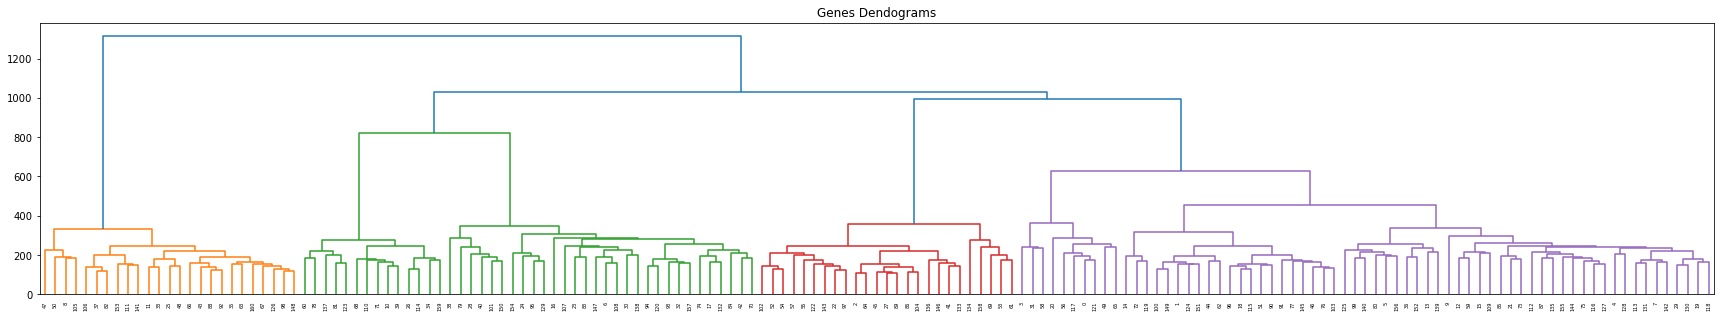

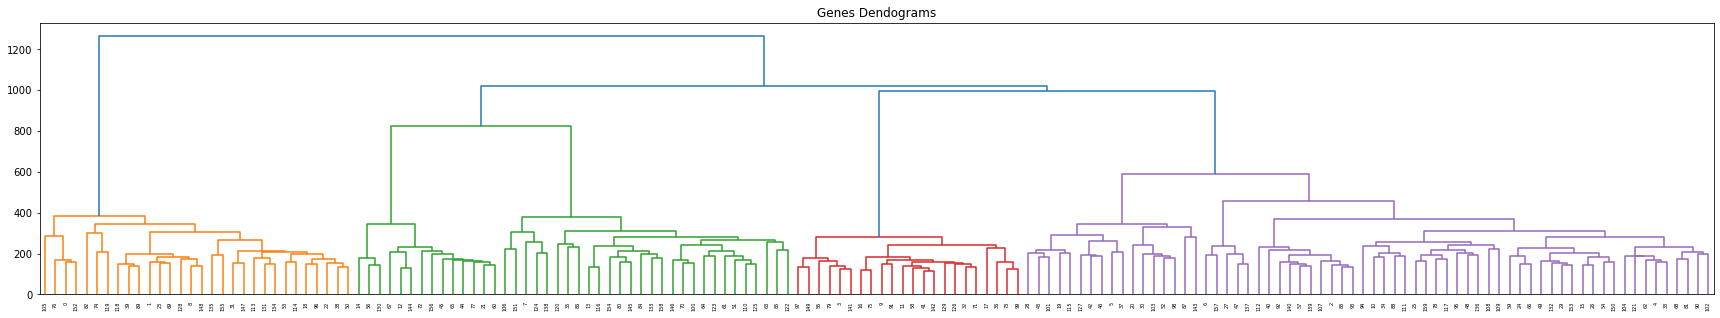

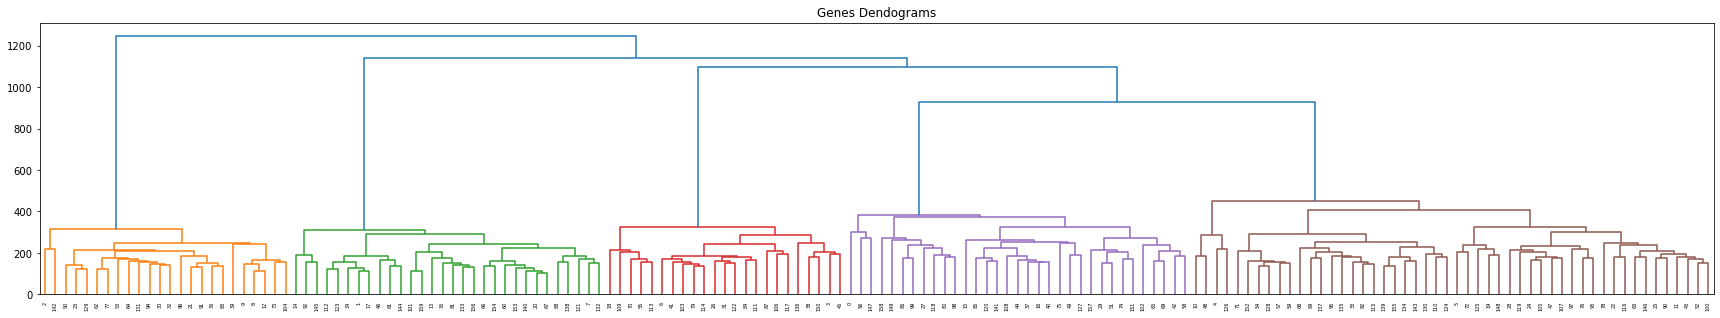

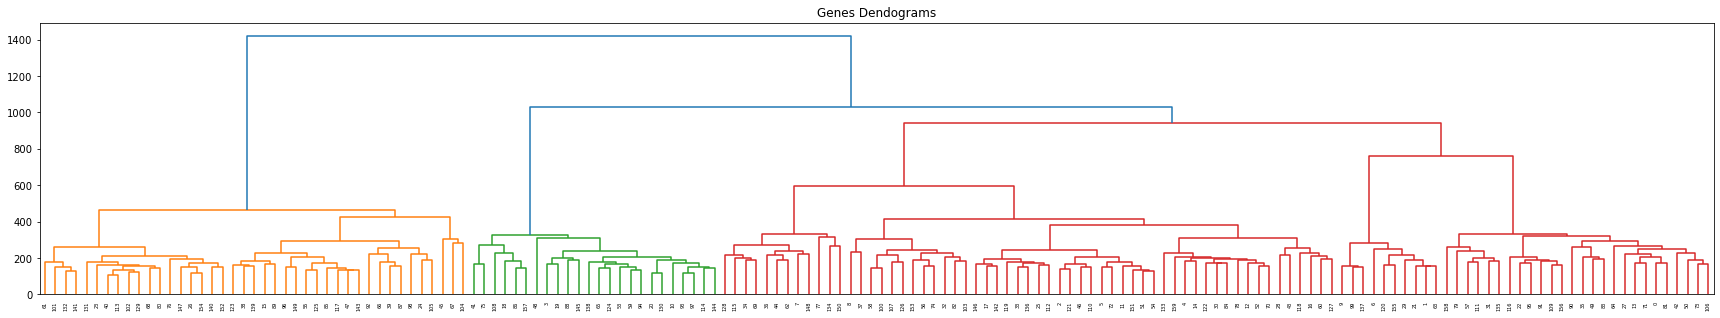

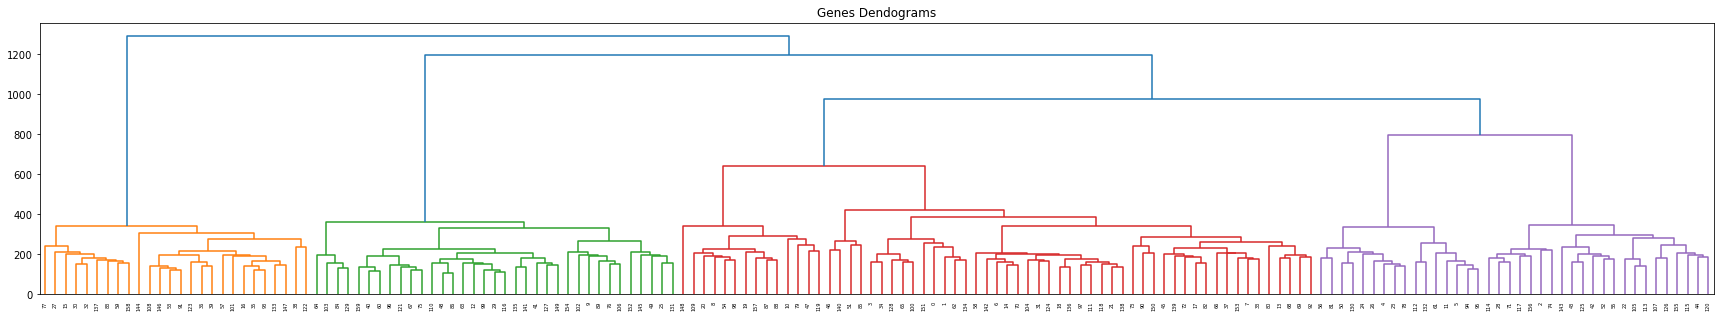

In [136]:
niz = np.linspace(0,800,801)
X= shuffle(niz, random_state=0)
five_split = np.array_split(X, 5)
for array in five_split:
    X_part = data.iloc[array]
    label_part = labels.iloc[array]
    plt.figure(figsize=(30, 5))
    plt.title("Genes Dendograms")
    dend = shc.dendrogram(shc.linkage(X_part, method='ward', metric='euclidean'))
    numbrerOfClusters = [4,5,6,8]
    for i in numbrerOfClusters:
        print(i)
        kmeans = KMeans(n_clusters=i, n_init=10, max_iter=3000, 
                    init='k-means++',random_state=42)
        kmeans.fit_predict(X_part)
        print('ARI Kmeans vs initial: ', metrics.adjusted_rand_score(kmeans.labels_, label_part["Class"]))
    